<a href="https://colab.research.google.com/github/hishamu7776/wavelet_vs_fourier/blob/main/Wavelet_vs_Fourier_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <center>Wavelet vs Fourier transform</center>
Signal processing is the process of analyzing, modifying, and synthesizing signals such as sounds, images, etc. in a useful way. Using some signals, we should evaluate and describe two important transformations in this project. We need to apply a series of transformations to extract features from the signals, such as Fourier transforms and wavelet transforms. The focus of this project is primarily on these transforms. In this project, we create synthetic signals with different behaviors, e.g., smooth signals, sharp signals, signals with discontinuities, etc. We then apply both transformations to these signals to determine the main effects of both transformations.


In [ ]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pywt
from scipy.ndimage import gaussian_filter1d
from scipy.signal import chirp
import matplotlib.gridspec as gridspec
from scipy import signal
from skimage import filters,img_as_float
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
from scipy import fftpack, ndimage

# How to choose scale for wavelet transform

Scale is a frequency-like property that helps us analyse signals. In fact, we can observe the changes in signals if we choose a good range of scales. We use the scale factor in the wavelet transform to observe the spectral details of the representation. The choice of scale is an important step in the wavelet transform because the scale explains the length of the wavelets. A smaller scale corresponds to a compressed or shrunken wavelet that is able to detect sharp or rapid changes in the signal, while the long scale is more stretched and can detect lower frequency components. The relationship between scale and frequency is just the opposite. The following sale illustrates the relationship between scale and how scale helps in signal analysis.

In [ ]:
t_min=0
t_max=10
fs=100
dt = 1/fs
time = np.linspace(t_min, t_max, 1500)

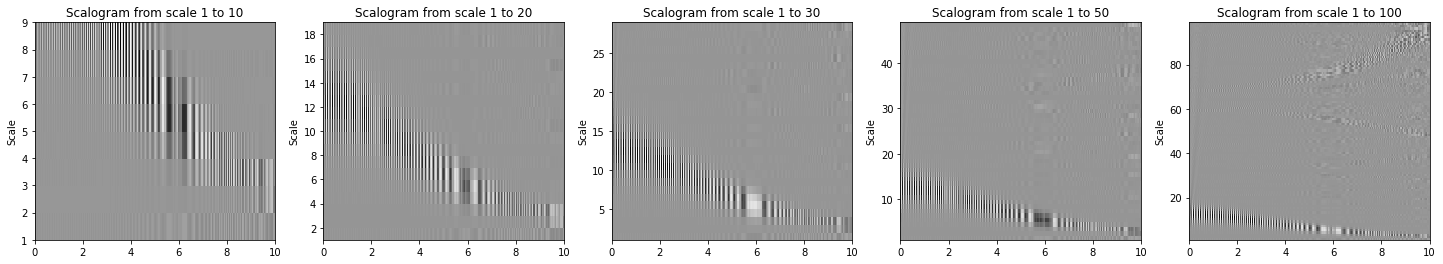

In [ ]:
#To understand the behaviour of scale, we used a smooth constant signal with a discontinuity. Adding discontinuity to the constant will have a rectangular shape.
w = chirp(time, f0=10, f1=50, t1=10, method='quadratic')

#Compute Wavelet Transform
scale = [10,20,30,50,100]

#Plot signal, FFT, and scalogram(to represent wavelet transform)
fig,axes =  plt.subplots(nrows=1,ncols=5,figsize=(25,4))
for i in range(2):
  for j in range(5):
    #Scalogram
    scales = np.arange(1,scale[j],1)
    coef,freqs = pywt.cwt(w,scales,'morl')
    freqs = pywt.scale2frequency('morl',scales,precision=8)
    if i == 0:
      axes[j].set_title("Scalogram from scale {} to {}".format(1,scale[j]))
    if i == 0:
      axes[j].pcolormesh(time, scales, coef,cmap='Greys')
      axes[j].set_ylabel("Scale")
plt.show();

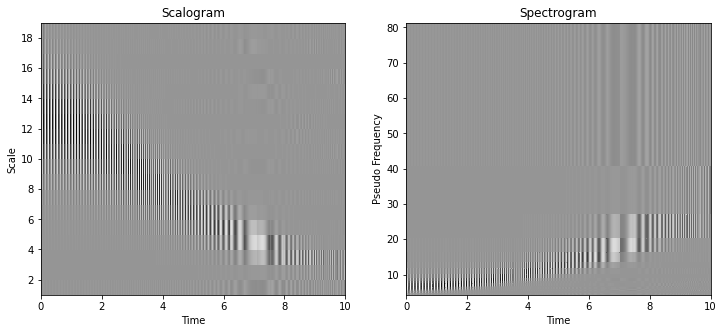

In [ ]:
scales = np.arange(1,20,1)
coef,freqs = pywt.cwt(w,scales,'morl',1/fs)
fig,axes =  plt.subplots(nrows=1,ncols=2,figsize=(12,5))
axes[0].set_title("Scalogram")
axes[0].pcolormesh(time, scales, coef,cmap='Greys')
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Scale")
axes[1].set_title("Spectrogram")
axes[1].pcolormesh(time, freqs, coef,cmap='Greys')
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Pseudo Frequency")
plt.show();

In the above examples, I have chosen to use a chirp signal to illustrate the wavelet transform. By choosing different ranges, even if it has the same scales repeatedly, it is easy to understand how the scales capture the spectral and temporal details of the signal. The small scale values capture the components with the highest frequency. In the signal, the frequency increases with time. This proves that the compressed scales capture the highest frequencies and the long scales capture the low frequency components. We also cannot calculate the exact frequency corresponding to the scale, but use a pseudo frequency instead.

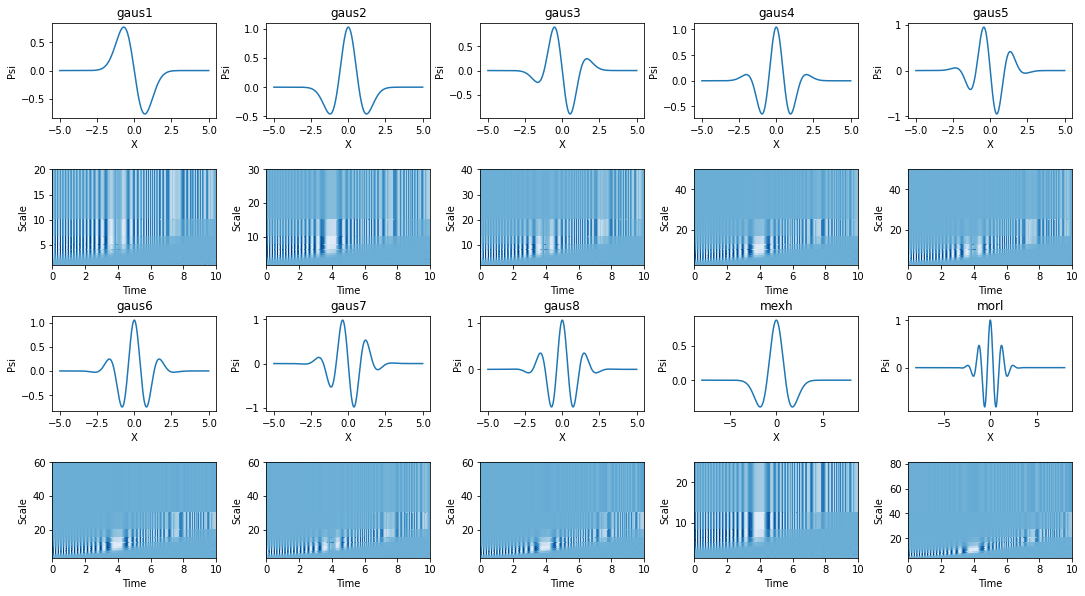

In [ ]:
families = ['gaus1','gaus2','gaus3','gaus4','gaus5','gaus6','gaus7','gaus8','mexh','morl']
cols = 5
rows = 4
scales = np.arange(1,20,1)
fig,axes =  plt.subplots(nrows = rows,ncols=5,figsize=(3*cols,2*rows))
fig.tight_layout(pad=1.0, w_pad=1.0, h_pad=3)
for i,family in enumerate(families):
  c = i%5
  r = round(i//5)
  coef,freqs = pywt.cwt(w,scales,family,1/fs)
  psi, x = pywt.ContinuousWavelet(family).wavefun(level=10)
  axes[r*2,c].set_title(family)
  axes[(r*2)+1,c].pcolormesh(time, freqs, coef,cmap='Blues')
  axes[(r*2)+1,c].set_xlabel("Time")
  axes[(r*2)+1,c].set_ylabel("Scale")
  axes[r*2,c].plot(x, psi)
  axes[r*2,c].set_xlabel("X")
  axes[r*2,c].set_ylabel("Psi")

Experiminting different wavelet transform on a chirp signal which has varying frequency from 10Hz to 50Hz in a quadratic way. I used a scale range between 1 and 20. Some mother wavelet morlet gives better result in this scenario.

# Constant Signal
Constant is the most basic and smoothest signal. It has only constant at each time. It can also be known as DC signal.

We consider 600 samples


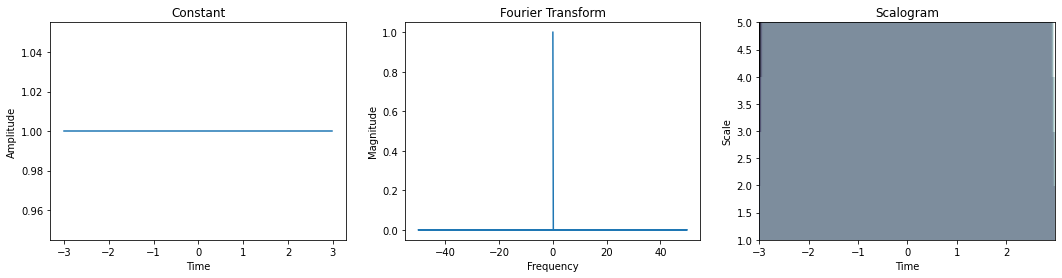

In [ ]:
fs = 100 #Sampling frequency
time = np.arange(-3,3,1/fs) #create time
n = len(time)
T=1/fs
print("We consider {} samples".format(n))
constant = np.ones(n) #Amblitude will be one(constant value)
freq =  np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), n)

#Compute Fourier transform of Constant signal
fft = fftpack.fft(constant)
freq = fftpack.fftfreq(time.shape[0],T)
phase  = np.angle(fft)
phase  = phase / np.pi

#Compute Wavelet Transform
scales = np.arange(1,6,1)
coef,freqs = pywt.cwt(constant,scales,'gaus1')

#Plot signal, FFT, and scalogram(to represent wavelet transform)
fig,axes =  plt.subplots(ncols=3,figsize=(18,4))

#Signal
axes[0].set_title("Constant")
axes[0].plot(time, constant)
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Amplitude")

#Fourier
axes[1].set_title("Fourier Transform")
axes[1].plot(freq, np.abs(fft)/n)
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Magnitude")

#Scalogram
axes[2].set_title("Scalogram")
axes[2].pcolormesh(time, scales, coef,cmap='bone')
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Scale")
plt.show();

Since the signal has no variation over time, the Fourier transform of the signal shows an amplitude one at frequency zero. We can see a plain result in scalogram.



# Adding discontinuity to constant signal
From the previous illustration we have taken that the frequency of the constant is 0. In this part we have changed the constant signal by adding a discontinuity from position 300 to 340 to the signal.

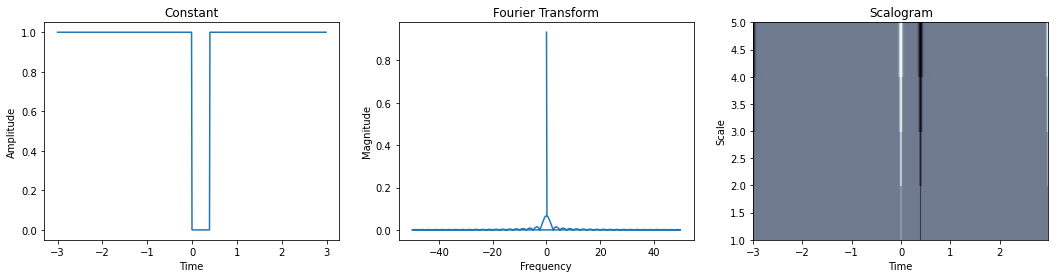

In [ ]:
constant[300:340]=0

#Compute Fourier transform of Constant signal
fft = fftpack.fft(constant)
phase  = np.angle(fft)
phase  = phase / np.pi

#Compute Wavelet Transform
scales = np.arange(1,6,1)
coef,freqs = pywt.cwt(constant,scales,'gaus1')

#Plot signal, FFT, and scalogram(to represent wavelet transform)
fig,axes =  plt.subplots(ncols=3,figsize=(18,4))

#Signal
axes[0].set_title("Constant")
axes[0].plot(time, constant)
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Amplitude")

#Fourier
axes[1].set_title("Fourier Transform")
axes[1].plot(freq, np.abs(fft)/n)
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Magnitude")

#Scalogram
axes[2].set_title("Scalogram")
axes[2].pcolormesh(time, scales, coef,cmap='bone')
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Scale")
plt.show();

The result of the Fourier transform shows a peak at zero as before. However, the frequencies spread out. This behavior of the Fourier transform shows that there are some discontinuities or changes in the signal. But the Fourier transform is not able to locate the discontinuity. The other graph is a scalogram representing the wavelet transform. Again, no frequency is seen most of the time, except for two peaks that can be seen in the scalogram that resemble discontinuities in the signal. The vertical lines represent the discontinuity of the constant.

# Rectangular Pulse
A rectangular pulse is nothing but a signal with a constant value for a particular period. I have created a rectangular pulse according to the following equation.

$$rect(t)= \bigg\{_{\;\;\;\;0\;\;\;\;otherwise}^{\;\;\;\;1\;\;\;\;if\;\;\;t\;\;>\;\;-\frac{1}{2}\;\;and\;\;t\;\;<\;\;\frac{1}{2}}$$

We consider 50000 samples


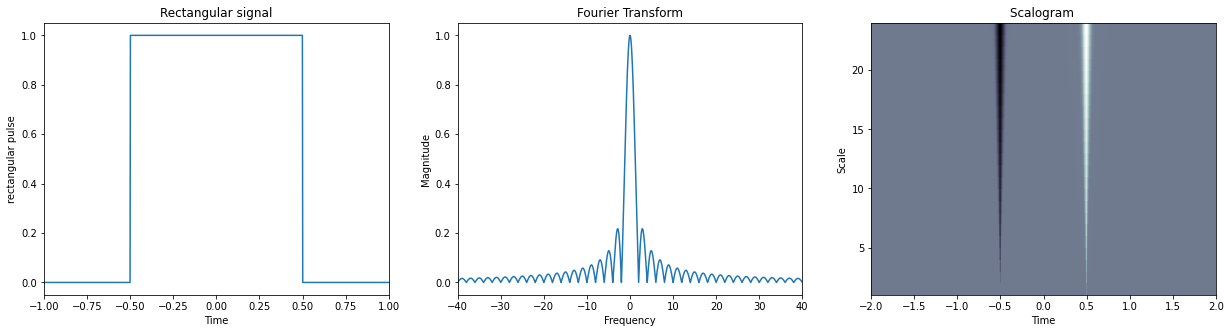

In [ ]:
N = 50000 #number of samples
fs = 1000 #sample frequency
T = 1/fs #interval
time = np.linspace(-(N*T), N*T, N)
rect = np.zeros(time.shape)
for i in range(time.shape[0]):
    if time[i] > -0.5 and time[i] < 0.5:
        rect[i] = 1.0
print("We consider {} samples".format(N))
freq =  np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)

#compute Fourier Trainsform
fft_rect = np.fft.fft(rect)
fr = np.fft.fftfreq(N)
phase  = np.angle(fft_rect)
phase  = phase / np.pi
freqrect = np.fft.fftfreq(time.shape[-1])
fft_rect = np.fft.fftshift(fft_rect)

#compute wavelet transform
scales = np.arange(1,25,1)
coef,freqs = pywt.cwt(rect,scales,'gaus1')

#Plot
#signal
fig,axes =  plt.subplots(ncols=3,figsize=(21,5))
axes[0].set_title("Rectangular signal")
axes[0].plot(time, rect)
axes[0].set_xlim(-1,1)
axes[0].set_xlabel("Time")
axes[0].set_ylabel("rectangular pulse")

#Fourier transform
axes[1].set_title("Fourier Transform")
axes[1].plot(freq,np.abs(fft_rect)*2/fs)
axes[1].set_xlim(-40,40)
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Magnitude")

#wavelet
axes[2].set_title("Scalogram ")
axes[2].pcolormesh(time, scales, coef,cmap='bone')
axes[2].set_xlim(-2,2)
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Scale")
plt.show();

The FFT of the square pulse looks similar to the discontinuity we added to the constant. The Fourier transform/spectrum of the square pulse is a sinusoidal function. In the wavelet function, we can see where exactly square is. We can see the scale at times -0.5 and 0.5. As we have already mentioned, the temporal details are lower at the low scale (high frequency).

# Sine and cosine waves
A sine wave is a mathematical curve that describes a smooth oscillation and it is a continuous wave. There are two different sine waves created based on following equation where $A=1$, $f= 200Hz$ and $f=130Hz$.

$$y(t)\;=\;A sin(2 \pi f t)$$

A cosine wave is another wave that is identical to that of a sine wave, except every point on the signal occurs exactly 1/4 cycle before the corresponding period on the sine wave. We will create a cosine wave with $f = 50Hz$. Then we will try to sum the the sine and cosine waves to observe how those signals transformed. The we try to explore the transformed result by adding noises and injecting signals into the signal.

We consider 2000 samples


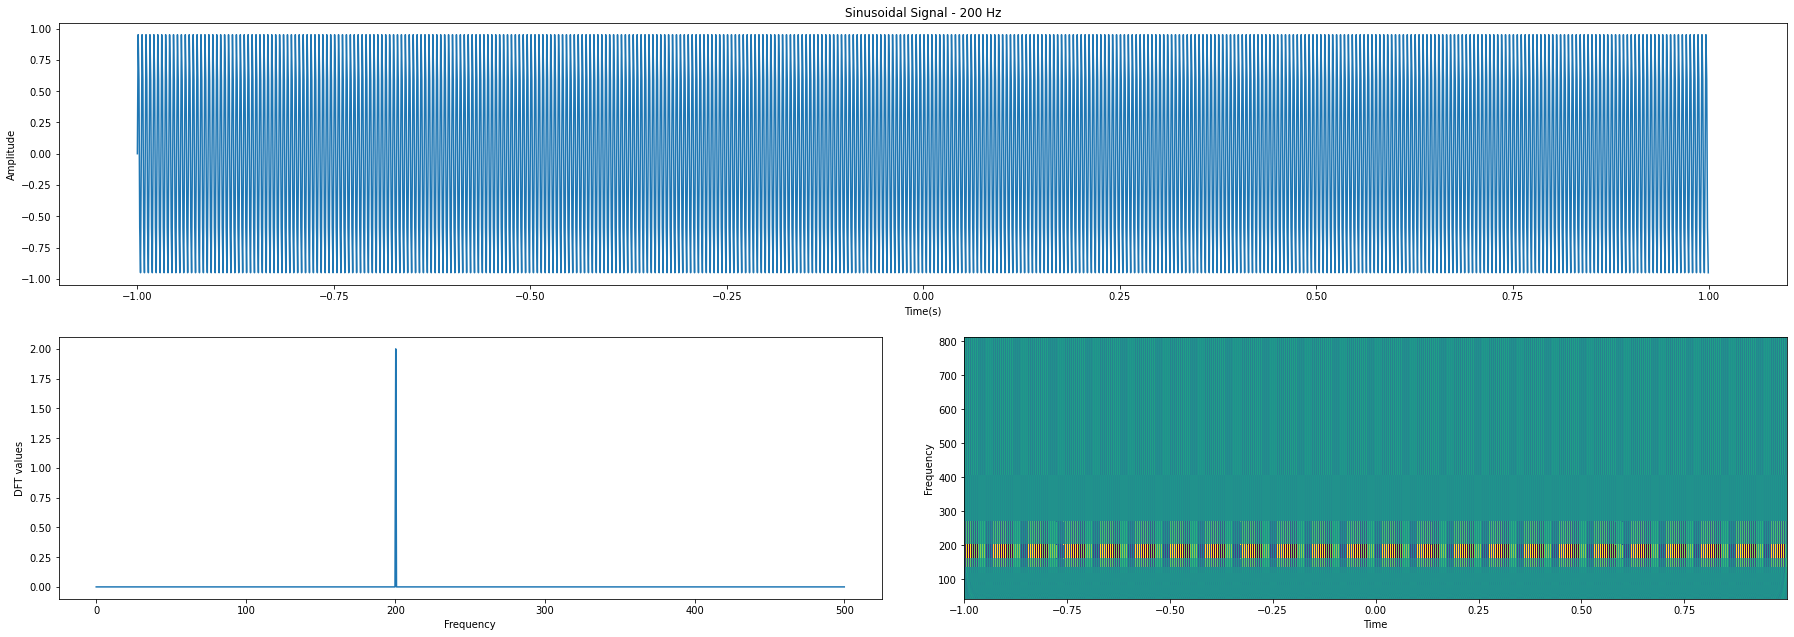

In [ ]:
fs = 1000 #sampling frequency
interval = 1/fs #sampling interval
t_min = -1 #start time
t_max = 1 # end time
dt=1/fs
time = np.arange(t_min,t_max,interval)

n = len(time)
print("We consider {} samples".format(n))

f = (fs/2)*np.linspace(0,1,int(n/2)) #frequency

freq = [200,130] #signal frequencies
scales1 = np.arange(1,20,1)

#Create signal with 200 hz frequency
sinewave1 = np.sin(2*np.pi*freq[0]*time)
new = sinewave1/np.square(time)
#compute fourier transform
fft1 = np.fft.fft(sinewave1)
fr = np.fft.fftfreq(n, d=dt)
phase  = np.angle(fft1)
phase  = phase / np.pi
fft1 = fft1[0:int(n/2)]

#compute wavelet
coef1,freqs1 = pywt.cwt(sinewave1,scales1,'morl')

#plot
gs = gridspec.GridSpec(2,2)
gs.update(left=0, right=4,top=2,bottom=0, hspace=.2,wspace=.1)
ax = plt.subplot(gs[0, :])
ax.set_title("Sinusoidal Signal - 200 Hz")
ax.plot(time,sinewave1)
ax.set_xlabel("Time(s)")
ax.set_ylabel("Amplitude")
ax2 = plt.subplot(gs[1, 0])
ax2.plot(f,np.abs(fft1)*2/fs)
ax2.set_xlabel("Frequency")
ax2.set_ylabel("DFT values")
ax3 = plt.subplot(gs[1, 1])
ax3.pcolormesh(time, freqs1/dt, coef1)
ax3.set_xlabel("Time")
ax3.set_ylabel("Frequency")
plt.show;

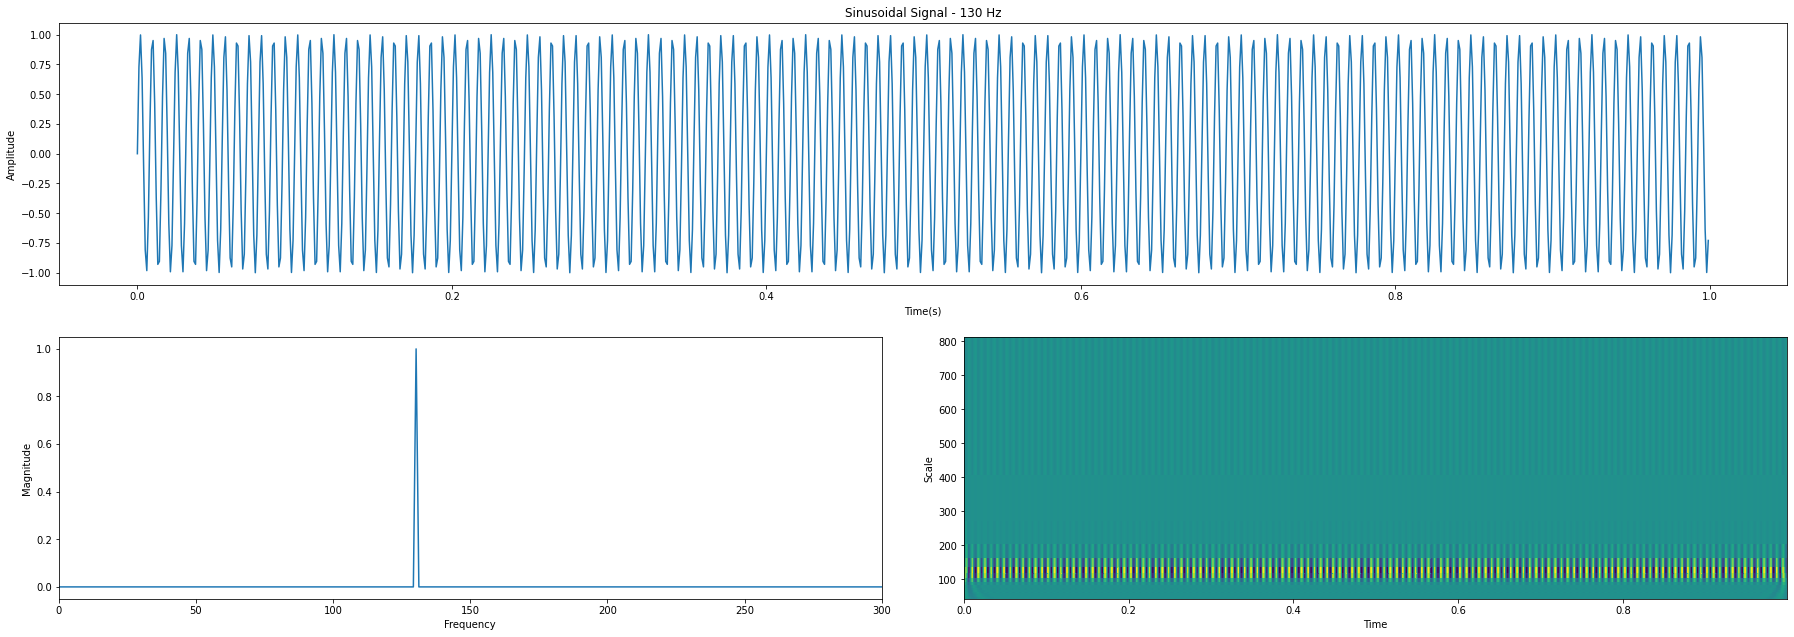

In [ ]:
scales = np.arange(1,20,1)
#Create signal with 130 hz frequency
sinewave2 = np.sin(2*np.pi*freq[1]*time)

#compute fourier transform
fft2 = np.fft.fft(sinewave2)
fft2=fft2[0:int(n/2)]

#compute wavelet
coef2,freqs2 = pywt.cwt(sinewave2,scales,'morl')
#plot
gs = gridspec.GridSpec(2,2)
gs.update(left=0, right=4,top=2,bottom=0, hspace=.2,wspace=.1)
ax = plt.subplot(gs[0, :])
ax.set_title("Sinusoidal Signal - 130 Hz")
ax.plot(time,sinewave2)
ax.set_xlabel("Time(s)")
ax.set_ylabel("Amplitude")
ax2 = plt.subplot(gs[1, 0])
ax2.plot(f,np.abs(fft2)*2/fs)
ax2.set_xlim(0,300)
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Magnitude")
ax3 = plt.subplot(gs[1, 1])
ax3.pcolormesh(time, freqs2/dt, coef2)
ax3.set_xlabel("Time")
ax3.set_ylabel("Scale")
plt.show();

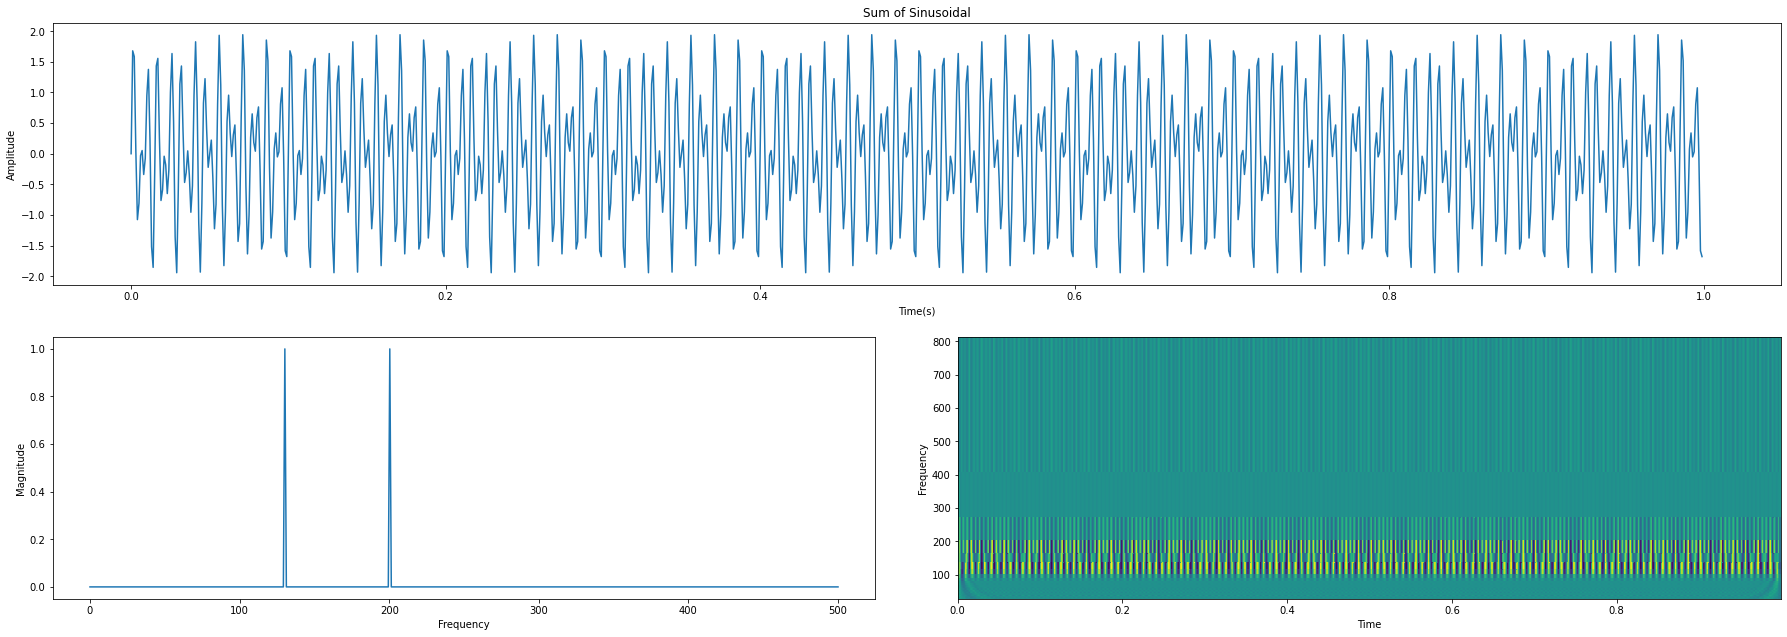

In [ ]:
scales = np.arange(1,30,1)

sum = sinewave1+sinewave2
fft3 = np.fft.fft(sum)
fft3=fft3[0:int(n/2)]
coef3,freqs3 = pywt.cwt(sum,scales,'morl')

#plot
gs = gridspec.GridSpec(2,2)
gs.update(left=0, right=4,top=2,bottom=0, hspace=.2,wspace=.1)


ax = plt.subplot(gs[0, :])
ax.set_title("Sum of Sinusoidal")
ax.plot(time,sum)
ax.set_xlabel("Time(s)")
ax.set_ylabel("Amplitude")
ax2 = plt.subplot(gs[1, 0])
ax2.plot(f,np.abs(fft3)*2/fs)
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Magnitude")
ax3 = plt.subplot(gs[1, 1])
ax3.pcolormesh(time, freqs3/dt, coef3)
ax3.set_xlabel("Time")
ax3.set_ylabel("Frequency")
plt.show();

# Create A Cosine wave

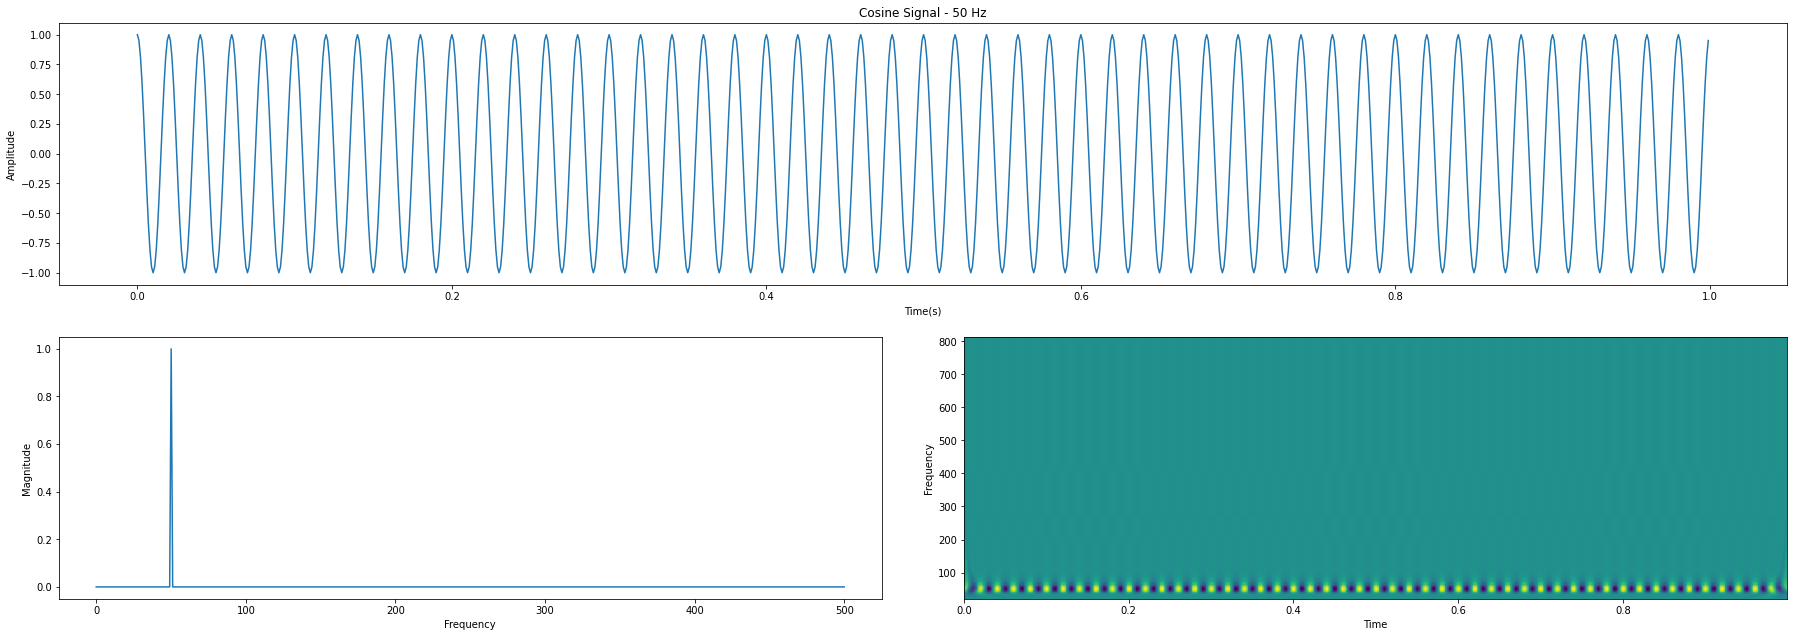

In [ ]:
scales = np.arange(1,40,1)
#creating two cosine waves at 50 hz frequency
coswave = np.cos(2*np.pi*50*time)
#compute Fourier Trainsform of amblitude with 10 Hz
fft = np.fft.fft(coswave)
fft=fft[0:int(n/2)]
coef,freqs = pywt.cwt(coswave,scales,'morl')
#plot
gs = gridspec.GridSpec(2,2)
gs.update(left=0, right=4,top=2,bottom=0, hspace=.2,wspace=.1)


ax = plt.subplot(gs[0, :])
ax.set_title("Cosine Signal - 50 Hz")
ax.plot(time,coswave)
ax.set_xlabel("Time(s)")
ax.set_ylabel("Amplitude")
ax2 = plt.subplot(gs[1, 0])
ax2.plot(f,np.abs(fft)*2/fs)
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Magnitude")
ax3 = plt.subplot(gs[1, 1])
ax3.pcolormesh(time, freqs/dt, coef)
ax3.set_xlabel("Time")
ax3.set_ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Frequency')

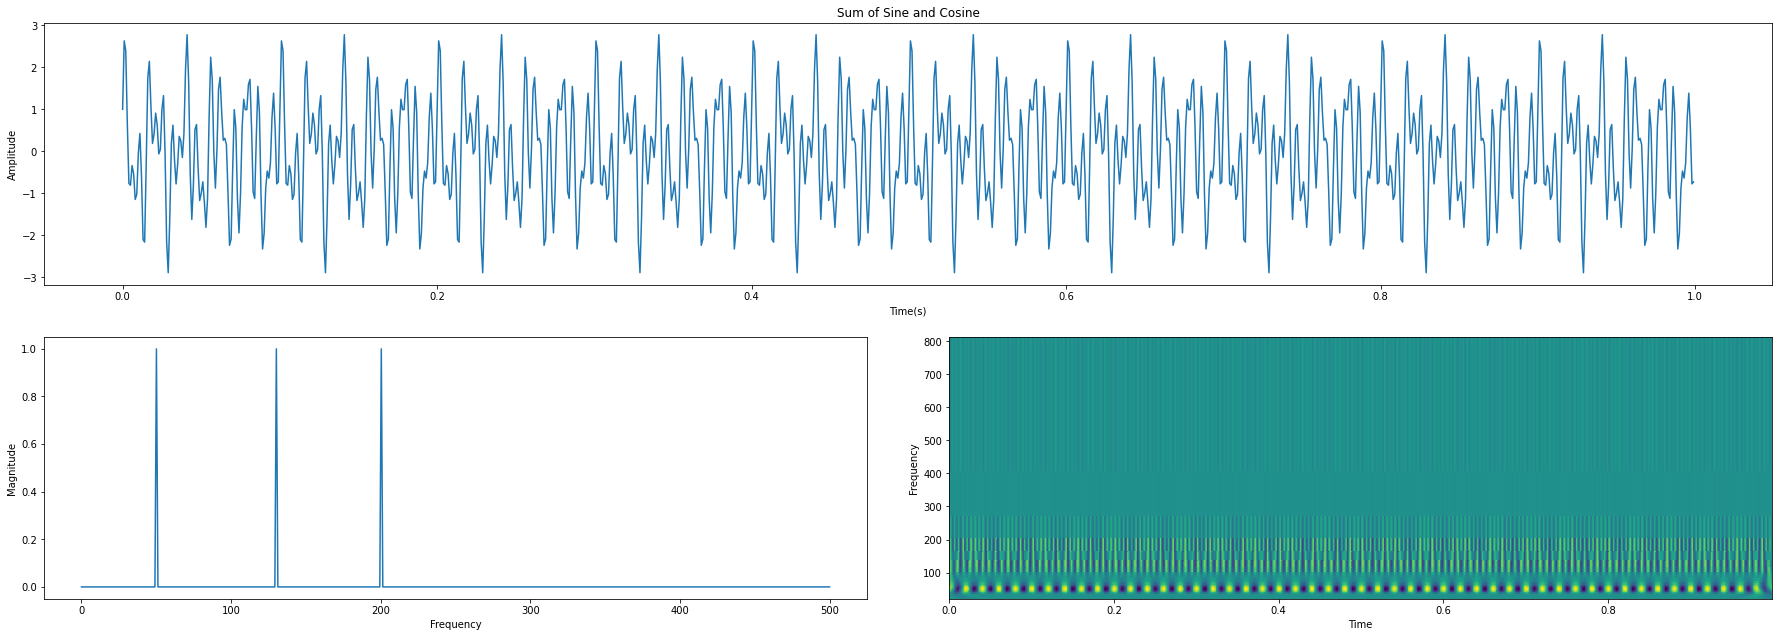

In [ ]:
scales = np.arange(1,40,1)
sum1 = sum+coswave
fft = np.fft.fft(sum1)
fft=fft[0:int(n/2)]
coef,freqs = pywt.cwt(sum1,scales,'morl')

#plot
gs = gridspec.GridSpec(2,2)
gs.update(left=0, right=4,top=2,bottom=0, hspace=.2,wspace=.1)


ax = plt.subplot(gs[0, :])
ax.set_title("Sum of Sine and Cosine")
ax.plot(time,sum1)
ax.set_xlabel("Time(s)")
ax.set_ylabel("Amplitude")
ax2 = plt.subplot(gs[1, 0])
ax2.plot(f,np.abs(fft)*2/fs)
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Magnitude")
ax3 = plt.subplot(gs[1, 1])
ax3.pcolormesh(time, freqs/dt, coef)
ax3.set_xlabel("Time")
ax3.set_ylabel("Frequency")

# Add discontinuity to Sum of Cosine and Sinusoidal waves

We created a signal by forming the sum of 2 sine waves and a cosine wave at 200Hz, 130Hz, and 50Hz, respectively. Here we add discontinuities at time .25 and at time .600 in different ways.

Text(0, 0.5, 'Frequency')

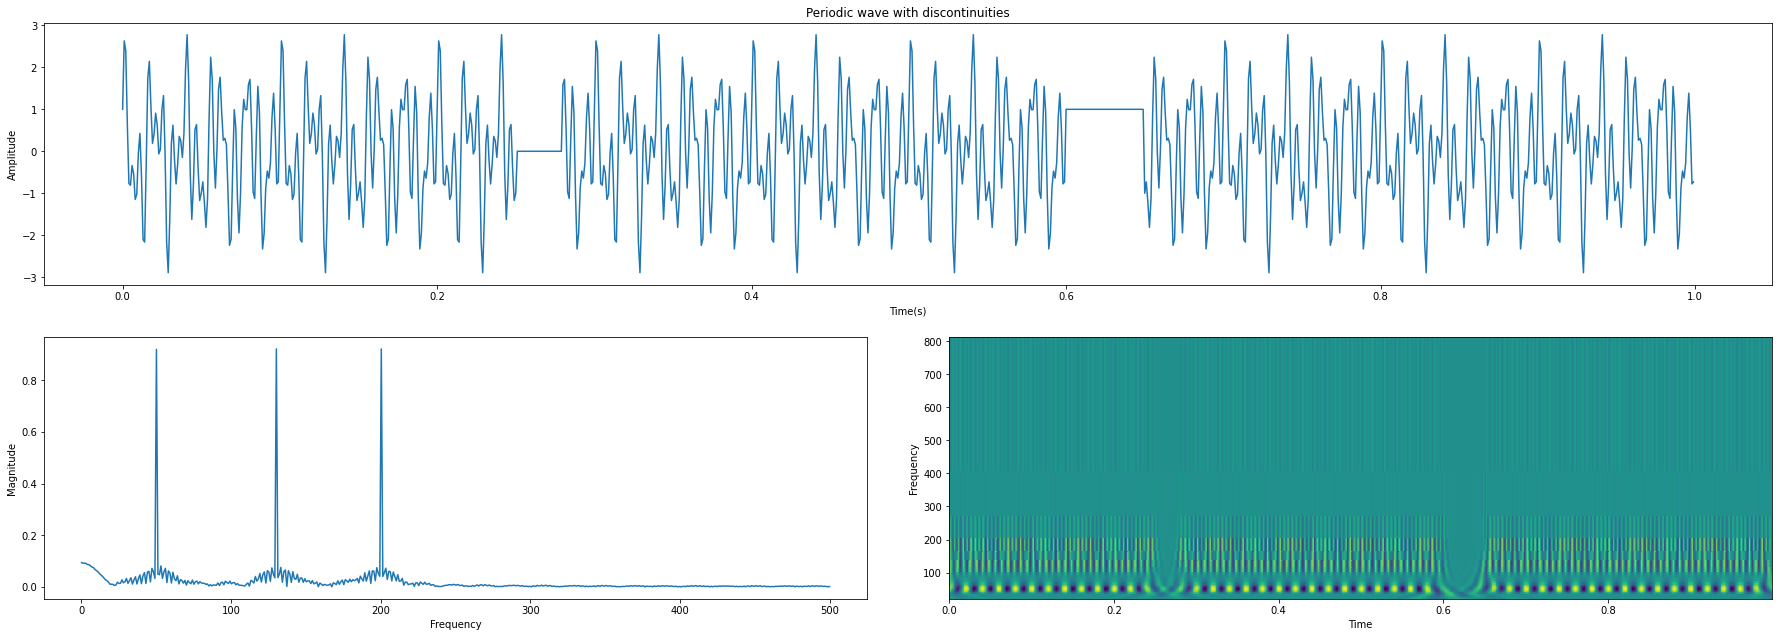

In [ ]:
scales = np.arange(1,40,1)
sum2 = sum1.copy()
for i in range(time.shape[0]):
    if time[i] > 0.25 and time[i] < 0.28:
        sum2[i] = 0
    if time[i] > .600 and time[i] < .650:
        sum2[i] = 1
fft = np.fft.fft(sum2)
fft=fft[0:int(n/2)]
coef,freqs = pywt.cwt(sum2,scales,'morl')

#plot
gs = gridspec.GridSpec(2,2)
gs.update(left=0, right=4,top=2,bottom=0, hspace=.2,wspace=.1)


ax = plt.subplot(gs[0, :])
ax.set_title("Periodic wave with discontinuities")
ax.plot(time,sum2)
ax.set_xlabel("Time(s)")
ax.set_ylabel("Amplitude")
ax2 = plt.subplot(gs[1, 0])
ax2.plot(f,np.abs(fft)*2/fs)
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Magnitude")
ax3 = plt.subplot(gs[1, 1])
ax3.pcolormesh(time, freqs/dt, coef)
ax3.set_xlabel("Time")
ax3.set_ylabel("Frequency")

I added noise at 2 spots in the signal. Some ripples appeared in fourier transform around the peaks. Wavelet transform were showed the frequency at each time in the spectrogram. It also showed the discontinuity in the spectrogram at two spots.

Text(0, 0.5, 'Frequency')

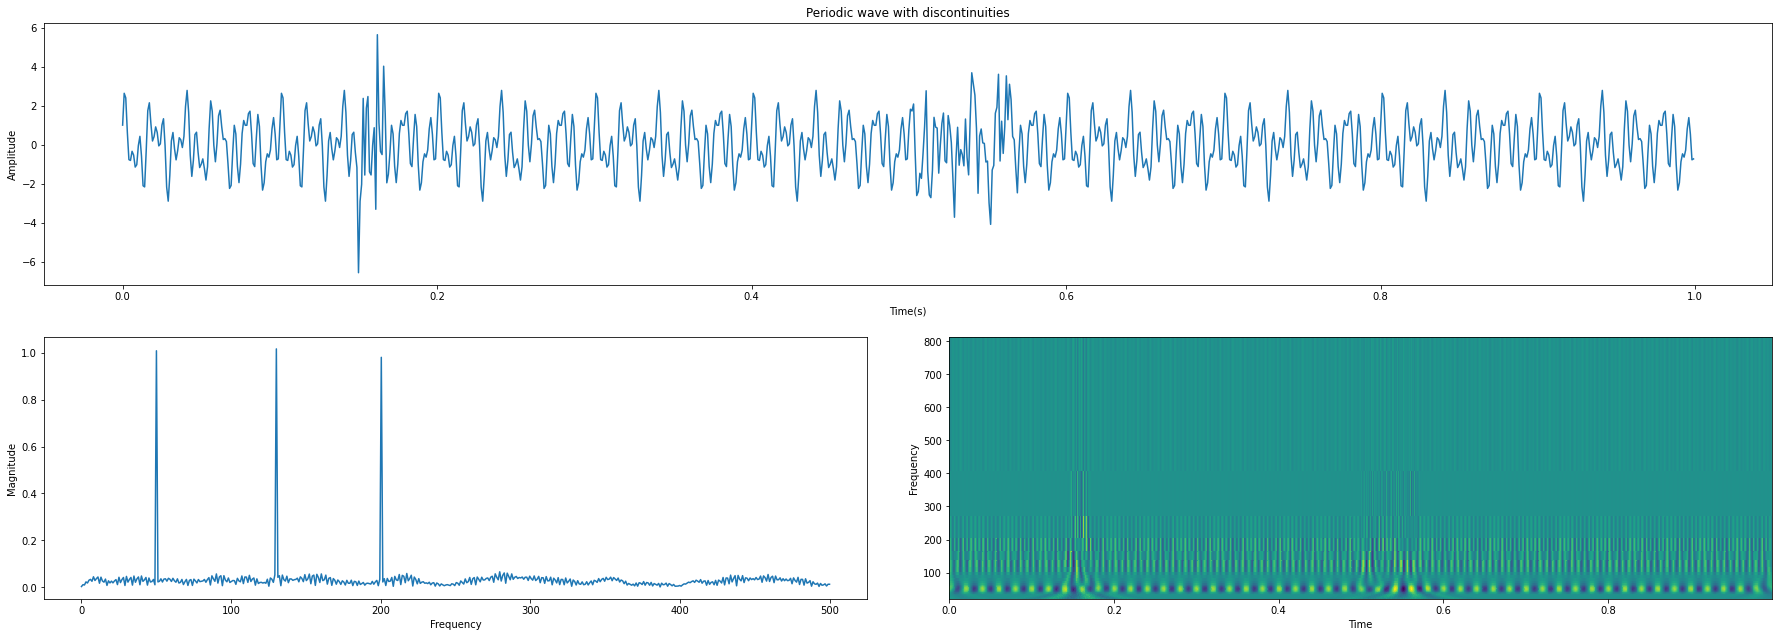

In [ ]:
scales = np.arange(1,40,1)
sum3 = sum1.copy()
s70 = np.random.normal(0, 0.001, 70)
s20 = np.random.normal(0, 0.002, 20)
for i in range(time.shape[0]):
    sum3[500:570] = sum3[500:570]+s70
    sum3[150:170] = sum3[150:170]+s20
fft = np.fft.fft(sum3)
fft=fft[0:int(n/2)]
coef,freqs = pywt.cwt(sum3,scales,'morl')

#plot
gs = gridspec.GridSpec(2,2)
gs.update(left=0, right=4,top=2,bottom=0, hspace=.2,wspace=.1)


ax = plt.subplot(gs[0, :])
ax.set_title("Periodic wave with discontinuities")
ax.plot(time,sum3)
ax.set_xlabel("Time(s)")
ax.set_ylabel("Amplitude")
ax2 = plt.subplot(gs[1, 0])
ax2.plot(f,np.abs(fft)*2/fs)
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Magnitude")
ax3 = plt.subplot(gs[1, 1])
ax3.pcolormesh(time, freqs/dt, coef)
ax3.set_xlabel("Time")
ax3.set_ylabel("Frequency")

# Inject a Signal to the Sum signal
We will add a signal into our sum of sinusoidal at particular time. So it will make a change in signal.

Text(0, 0.5, 'Frequency')

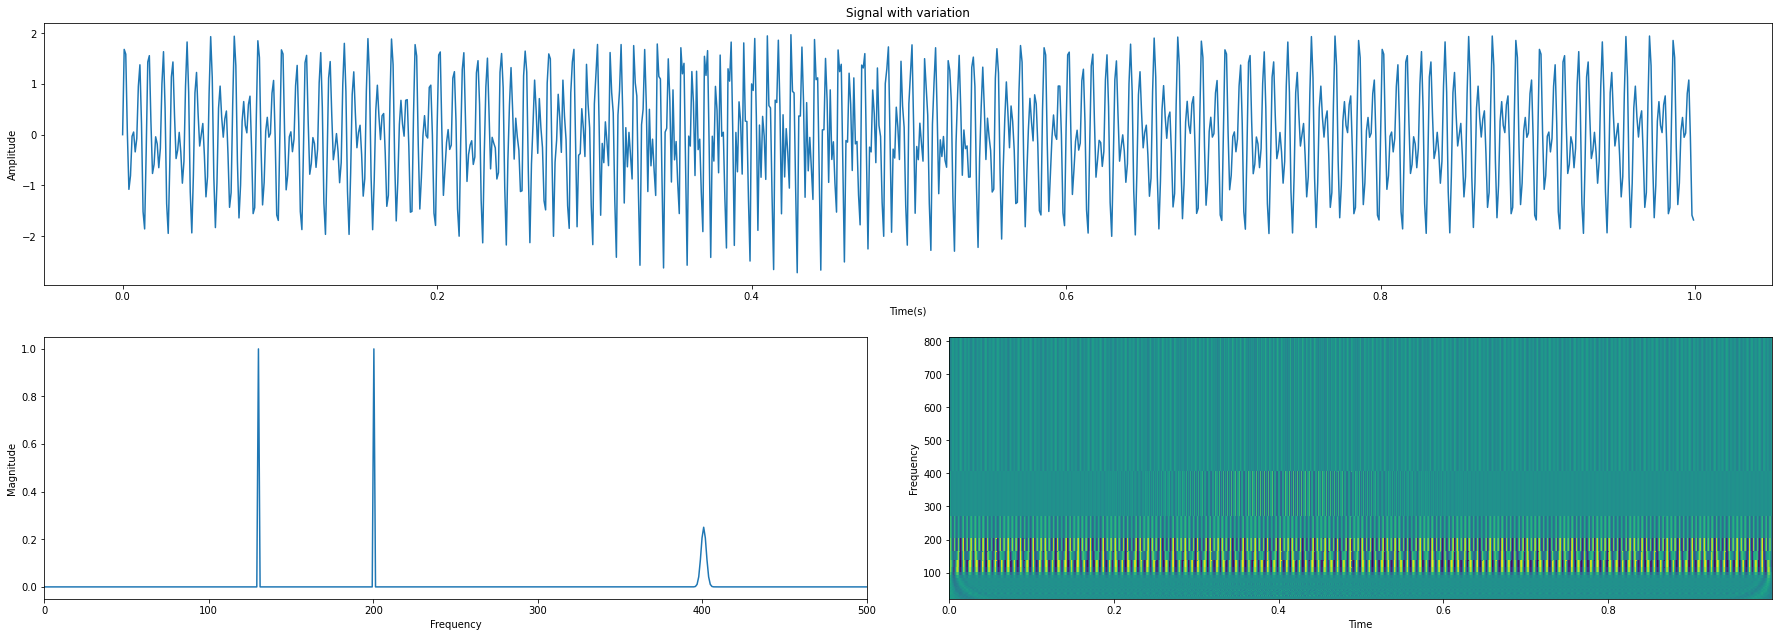

In [ ]:
scales = np.arange(1,40,1)
sum_disc = sum+np.real(np.exp(-50*(time-0.4)**2)*np.exp(1j*2*np.pi*400*(time-0.4)))
fft = np.fft.fft(sum_disc)
fft=fft[0:int(n/2)]
coef,freqs = pywt.cwt(sum_disc,scales,'morl')


#plot
gs = gridspec.GridSpec(2,2)
gs.update(left=0, right=4,top=2,bottom=0, hspace=.2,wspace=.1)


ax = plt.subplot(gs[0, :])
ax.set_title("Signal with variation")
ax.plot(time,sum_disc)
ax.set_xlabel("Time(s)")
ax.set_ylabel("Amplitude")
ax2 = plt.subplot(gs[1, 0])
ax2.plot(f,np.abs(fft)*2/fs)
ax2.set_xlim(0,500)
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Magnitude")
ax3 = plt.subplot(gs[1, 1])
ax3.pcolormesh(time, freqs*1000, coef)
ax3.set_xlabel("Time")
ax3.set_ylabel("Frequency")

The Fourier transform results obtained for simple sine and cosine transforms were peaks at corresponding frequencies of the signals. If we consider the wavelet transform, we can observe a result that leaves the frequencies unchanged at each instant. When it is the sum of the signals, the Fourier transform shows all the peaks in the magnitude spectrum. Wavelet shows three unchanged frequency lines. When part of the signal is set to 1 and 0, waves appear in the magnitude spectrum, where the scalogram locates the changes perfectly. Fourier showed the same result even after noise was added to the signal. But the wavelets find out exactly what is happening in the frequency. Injecting a new signal at a certain point in the signal never produced a frequency spread other than a different peak at 400 Hz with different power. The wavelet shows a strict line in the scalogram at frequency 400 for a certain time.

# Non stationary signals

When the frequency or spectral content of a signal does not change with time, it is said to be stationary. We will consider several signals with multiple frequencies where the frequencies will change over time. We have already seen multiple frequencies in a signal. Since we have already dealt with 3 different frequencies in a single signal and analyzed its performance under both transformations, we will again use a signal with three different frequencies. Unlike the previous signal examples, here the frequencies are varied over time.

Text(0, 0.5, 'Frequency')

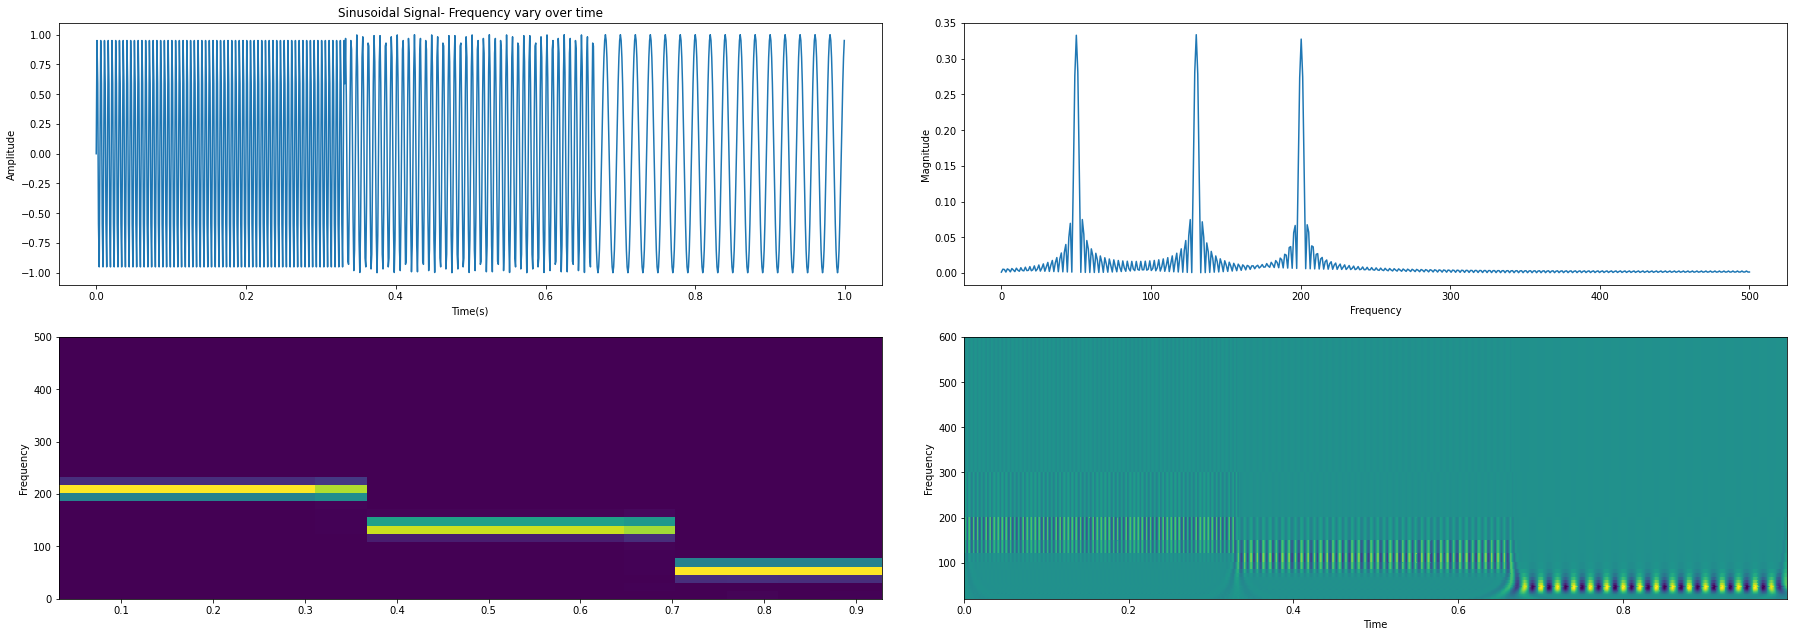

In [ ]:
size = len(time)//3
scales = np.arange(1,31,1)
sig = np.zeros(time.shape)
sig[:size]=np.sin(2*np.pi*200*time[:size])
sig[size:size*2]=np.sin(2*np.pi*130*time[size:size*2])
sig[size*2:]=np.cos(2*np.pi*50*time[size*2:])
fft = np.fft.fft(sig)
fft=fft[0:int(n/2)]
coef,freqs = pywt.cwt(sig,scales,'gaus8')
stft_f, stft_t, Sxx = signal.spectrogram(sig, fs,window='hann', nperseg=64)
#plot
gs = gridspec.GridSpec(2,2)
gs.update(left=0, right=4,top=2,bottom=0, hspace=.2,wspace=.1)


ax = plt.subplot(gs[0, 0])
ax.set_title("Sinusoidal Signal- Frequency vary over time")
ax.plot(time,sig)
ax.set_xlabel("Time(s)")
ax.set_ylabel("Amplitude")
ax1 = plt.subplot(gs[0, 1])
ax1.plot(f,np.abs(fft)*2/fs)
ax1.set_xlabel("Frequency")
ax1.set_ylabel("Magnitude")
ax2 = plt.subplot(gs[1, 0])
ax2.pcolormesh(stft_t, stft_f, Sxx)
ax2.set_ylabel("Frequency")
ax3 = plt.subplot(gs[1, 1])
ax3.pcolormesh(time, freqs/dt, coef)
ax3.set_xlabel("Time")
ax3.set_ylabel("Frequency")

From the diagram above, we can see that there are three frequencies in the Fourier transform at 200, 130, and 50. But we cannot differentiate with the sum of the sinusoids, which will also have the same peaks. There are some differences in amplitude and the sudden change in frequency is called ripple. There are frequencies at all times (ripple). Since the Fourier transform does not work well for time-varying signals, we used the STFT for this purpose. The wavelet transform provides the detailed time information of the frequencies.

## Lets try on chirp signals

In this part we will create few chirp signals of all type. The frequency of a chirp signal increases (up-chirp) or falls (down-chirp) with time. The terms chirp and sweep signal are used interchangeably in some sources. There are different types of chirp signals.
* Linear
* quadratic
* logarithmic
* Hyperbolic


## Linear Chirp Signal

The instantaneous frequency $f(t)$ varies exactly linearly with time in a linear-frequency chirp, or simply linear chirp.

$$f(t)=f0+\frac{(f1-f0)t}{T}$$

We create two different linear chirp signals which have frequency between $10Hz$ and $50Hz$. A chirp signal has increasing frequency and the other one has the decreasing frequency.

In [ ]:
def plot_chirp_transforms(type_,f0,f1):
  #Create linear chirp signal with frequency between 50Hz and 10Hz
  t_min=0
  t_max=10
  time = np.linspace(t_min, t_max, 1500)
  N = len(time)
  interval = (t_min+t_max)/N
  fs = int(1/interval)
  dt=1/fs
  f = (fs/2)*np.linspace(0,1,int(N/2))
  w1 = chirp(time, f0=f0, f1=f1, t1=10, method=type_.lower())
  #Compute FFT
  w1fft = np.fft.fft(w1)
  w1fft=w1fft[0:int(N/2)]
  #Compute Wavelet transform
  scales=np.arange(1,50,1)
  wcoef,wfreqs = pywt.cwt(w1,scales,'morl')

  #Compute Short Time Fourier transfomr
  stft_f, stft_t, Sxx = signal.spectrogram(w1, fs,window='hann', nperseg=64,noverlap=32)

  #Plot the results
  gs = gridspec.GridSpec(2,2)
  gs.update(left=0, right=4,top=2,bottom=0, hspace=.2,wspace=.1)
  ax = plt.subplot(gs[0, 0])
  ax.set_title("Chirp - "+type_+" ({}Hz to {}Hz)".format(f0,f1))
  ax.plot(time,w1)
  ax.set_xlabel("Time(s)")
  ax.set_ylabel("Amplitude")
  ax1 = plt.subplot(gs[0, 1])
  ax1.plot(f,np.abs(w1fft)*2/fs)
  plt.grid()
  ax1.set_title("FFT - "+type_+" chirp signal ({}Hz to {}Hz)".format(f0,f1))
  ax1.set_xlabel("Frequency")
  ax1.set_ylabel("Magnitude")
  ax2 = plt.subplot(gs[1, 0])
  ax2.set_title("STFT - "+type_+" chirp signal ({}Hz to {}Hz)".format(f0,f1))
  ax2.pcolor(stft_t, stft_f, Sxx,cmap='copper')
  ax2.set_xlabel("Time")
  ax2.set_ylabel("Frequency")
  ax3 = plt.subplot(gs[1, 1])
  ax3.set_title("WT - "+type_+" chirp signal ({}Hz to {}Hz)".format(f0,f1))
  ax3.pcolor(time, wfreqs/dt, wcoef,cmap='copper')
  ax3.set_ylim(5,75)
  ax3.set_xlabel("Time")
  ax3.set_ylabel("Frequency")


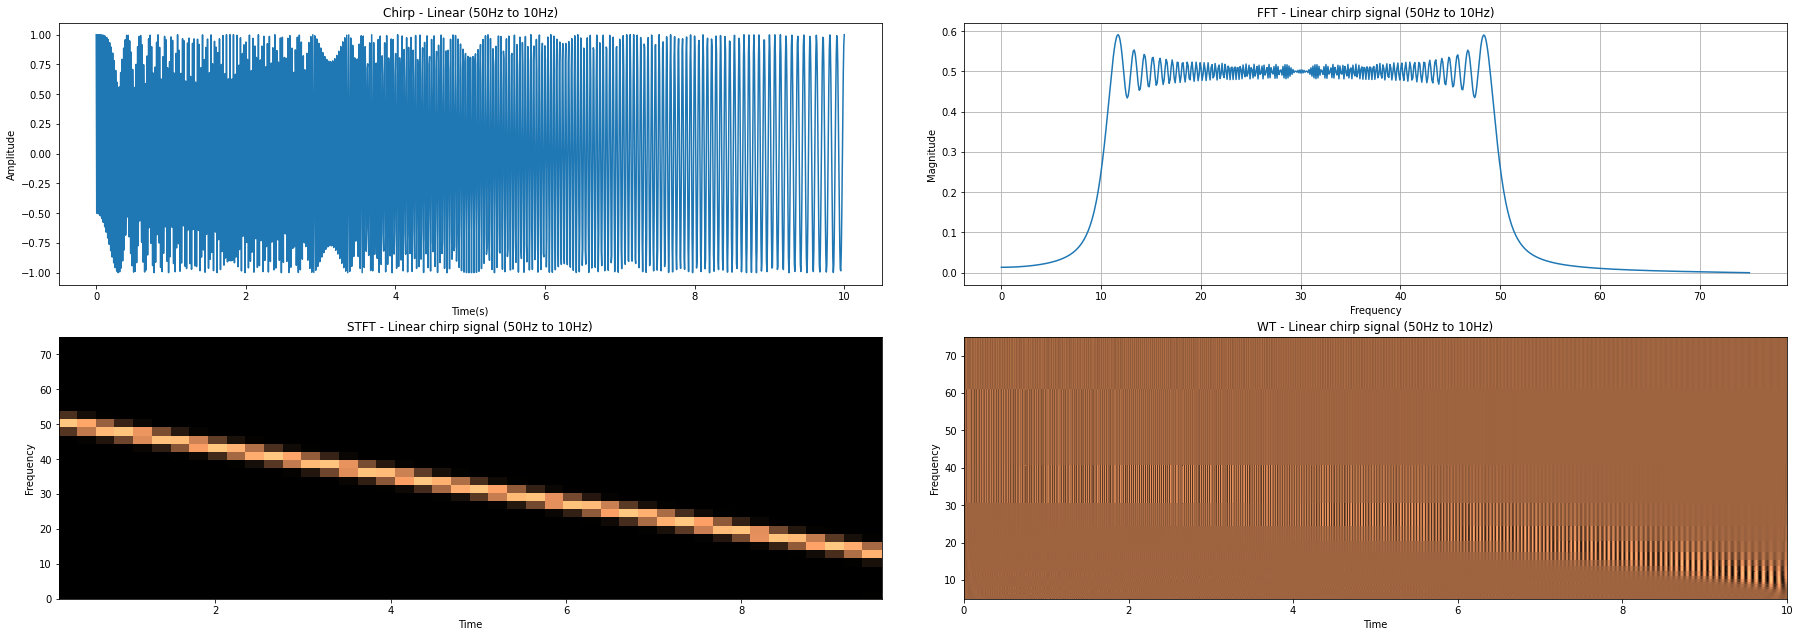

In [ ]:
plot_chirp_transforms('Linear',50,10)

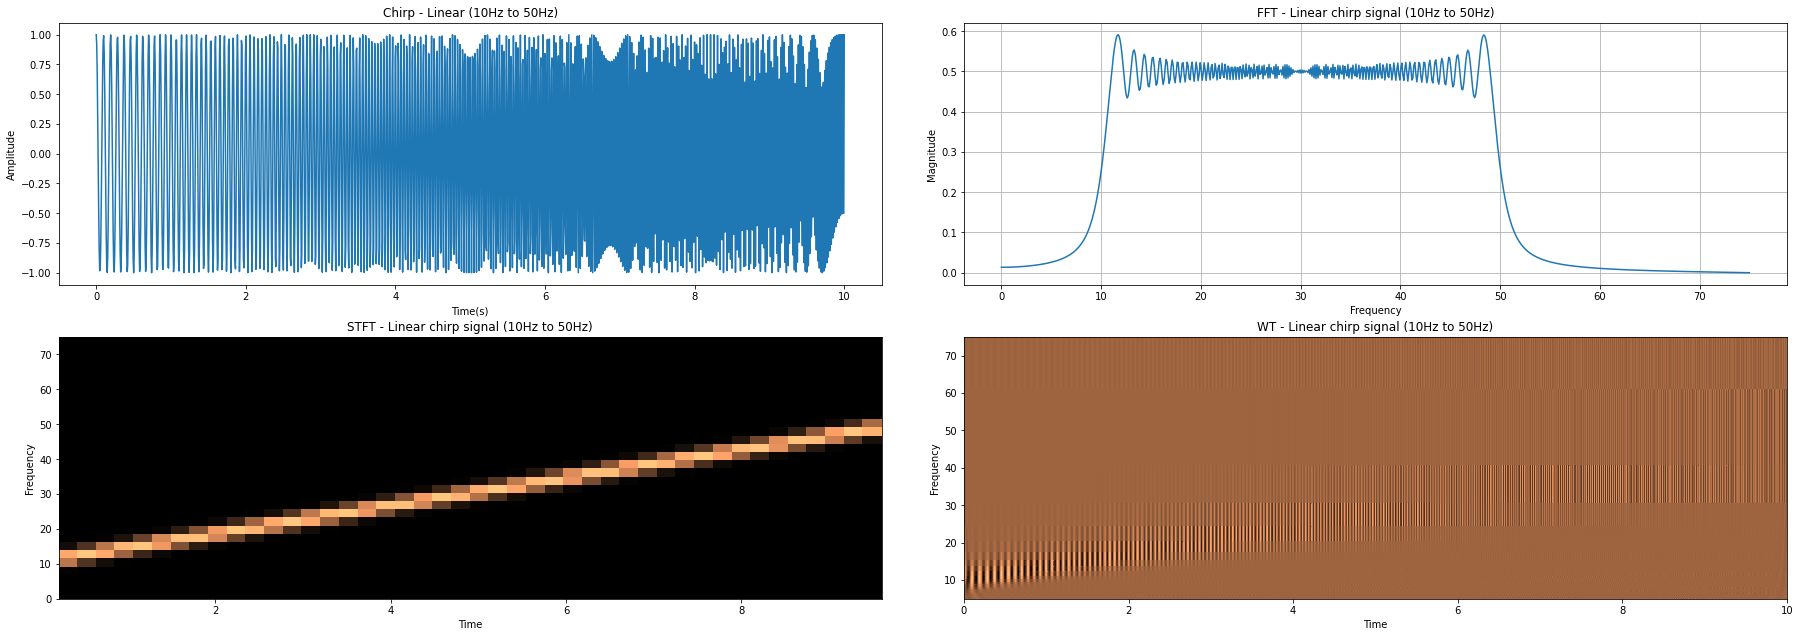

In [ ]:
plot_chirp_transforms('Linear',10,50)

Fourier transform of both linear chirp signals are similar, both have frequency peaks between 10Hz and 50Hz. Both Short time fourier transform and Fourier transform showed the exact nature of frequency.

#Quadratic Chirp Signal

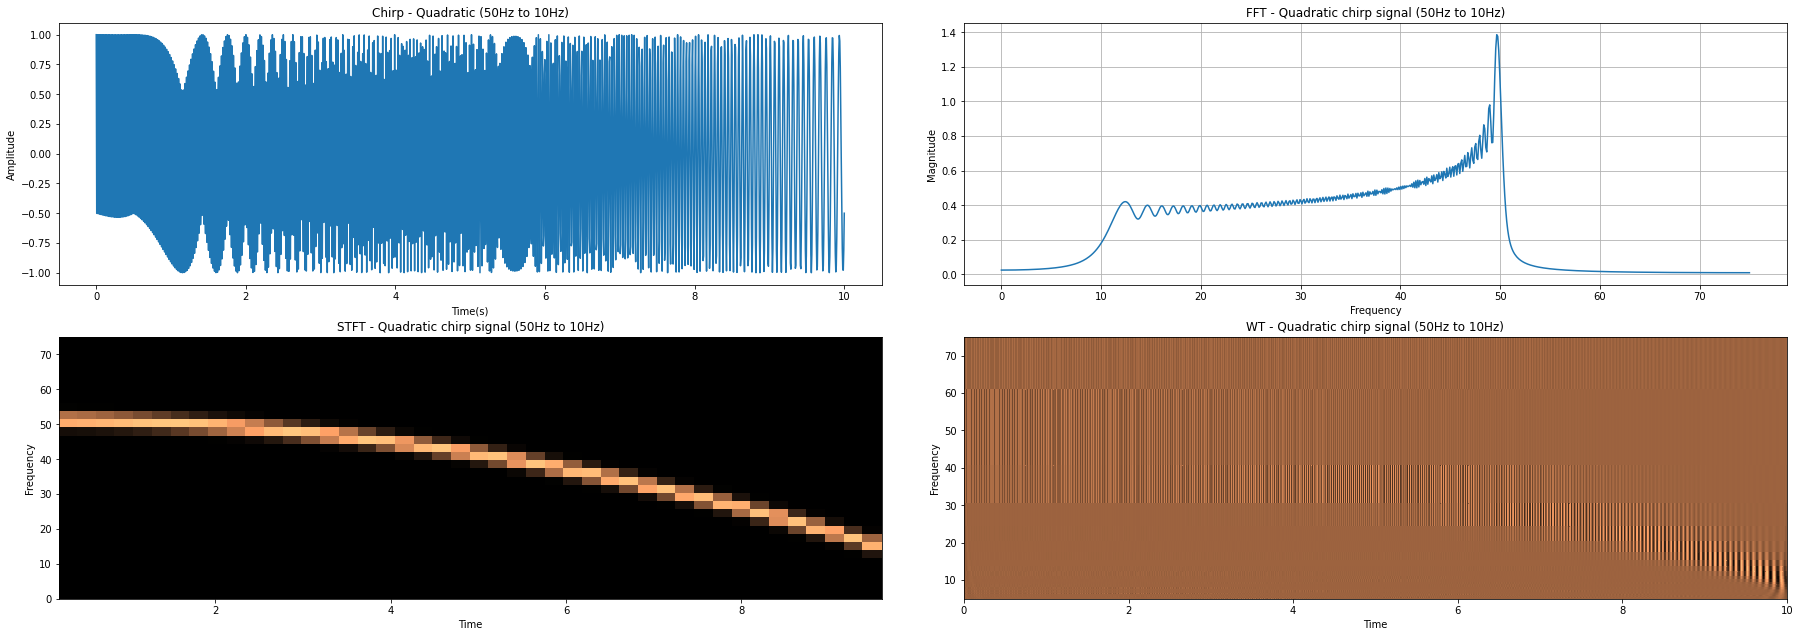

In [ ]:
plot_chirp_transforms('Quadratic',50,10)

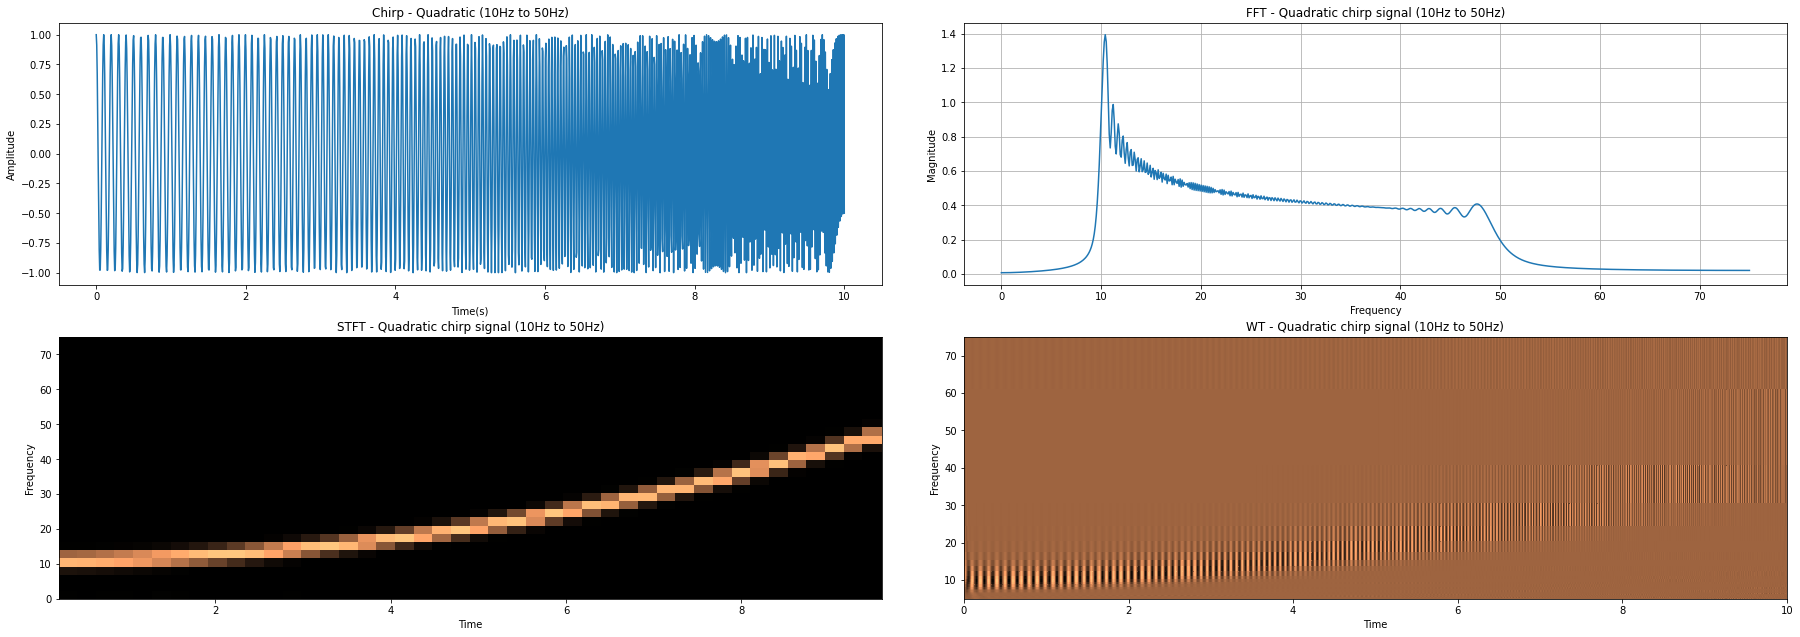

In [ ]:
plot_chirp_transforms('Quadratic',10,50)

When we take quadratic chirp signal, we will be able to see difference in both FFT and wavelet transform. the frequncies amblitude has changed to a curve shape while wavelet's curve has changed to a different curve.

# Logarithmic Chirp Signal

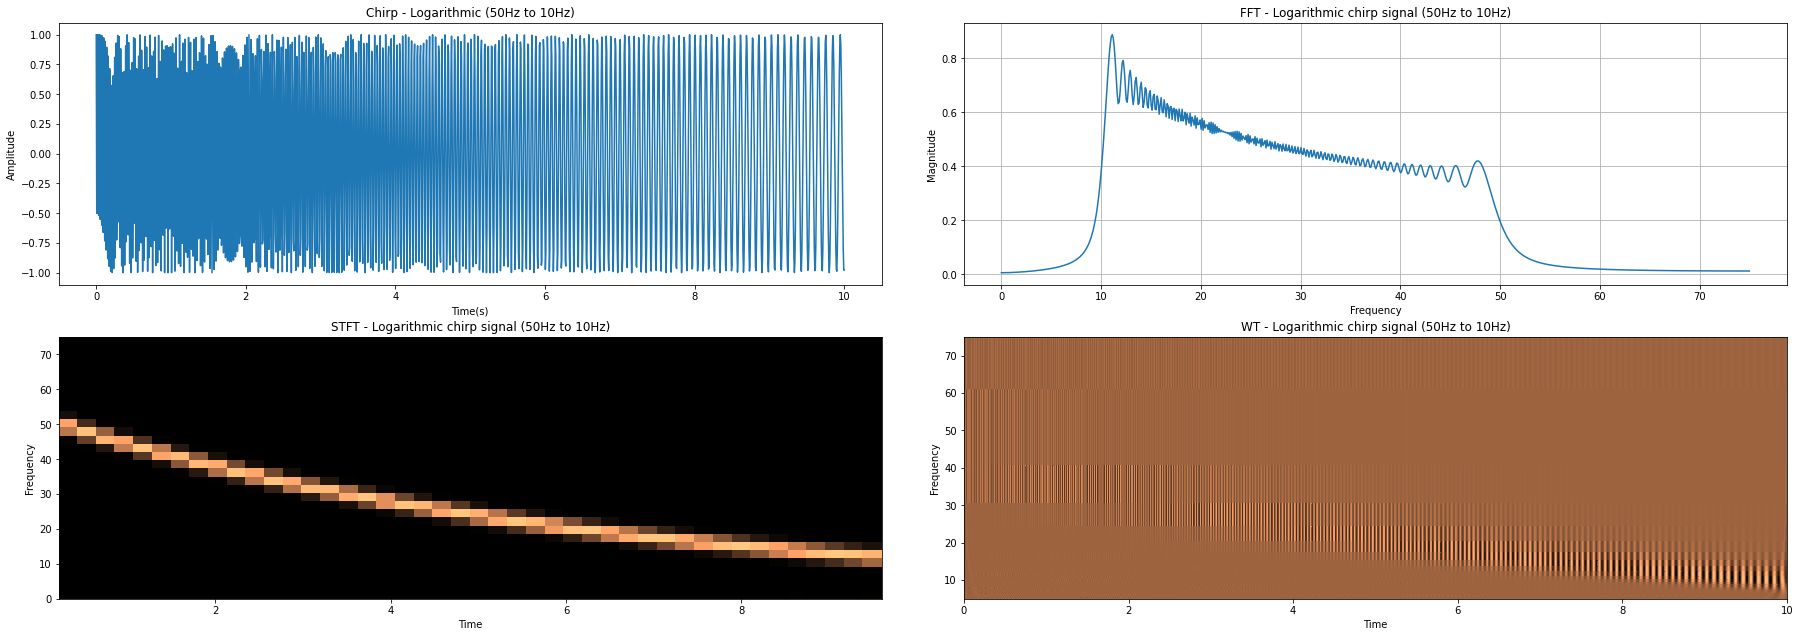

In [ ]:
plot_chirp_transforms('Logarithmic',50,10)

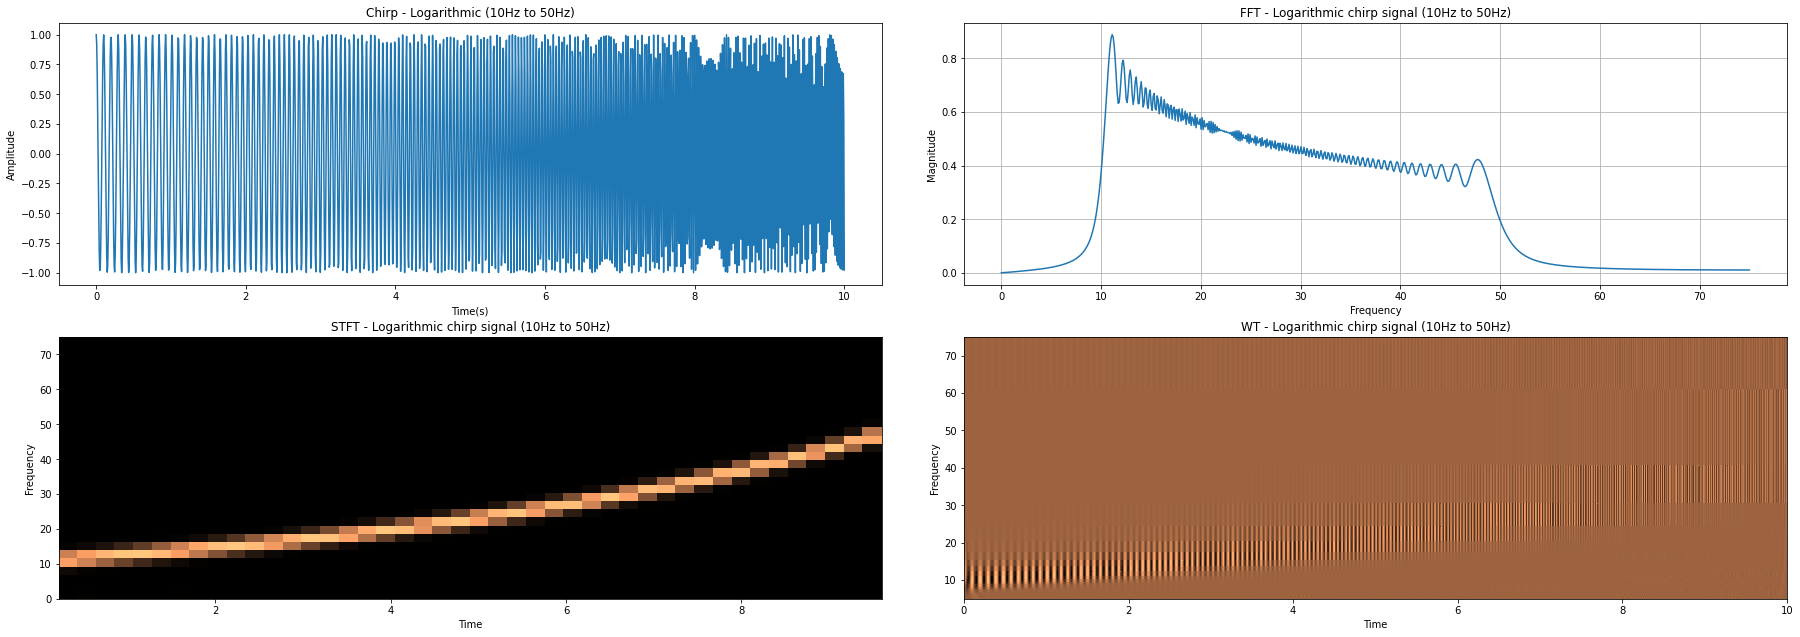

In [ ]:
plot_chirp_transforms('Logarithmic',10,50)

Logarithmic chirp signal's FFT looks almost similar to result of quadratic. However there are amblitude differences. The same effect can be noted in wavelets.

# Hyperbolic Chirp Signal

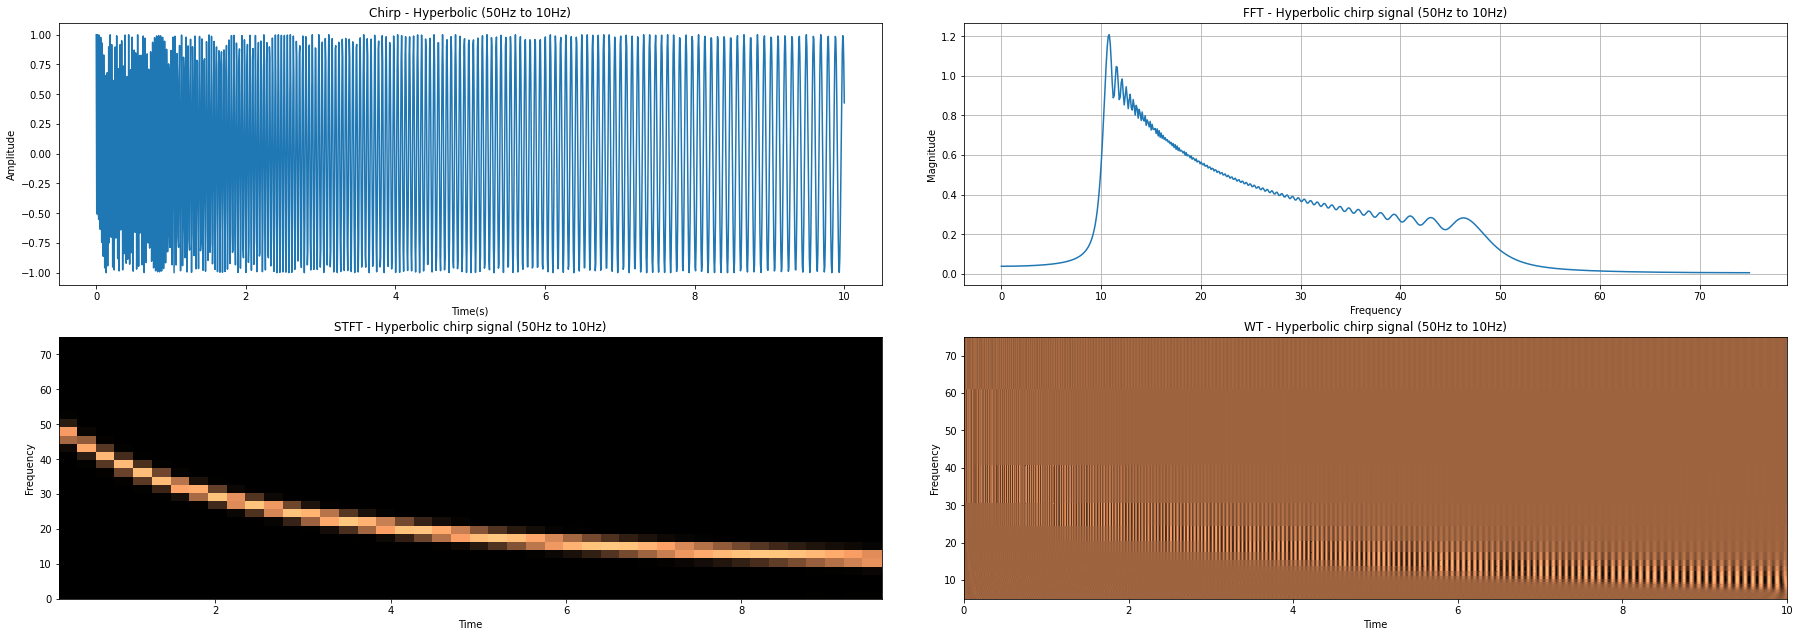

In [ ]:
plot_chirp_transforms('Hyperbolic',50,10)

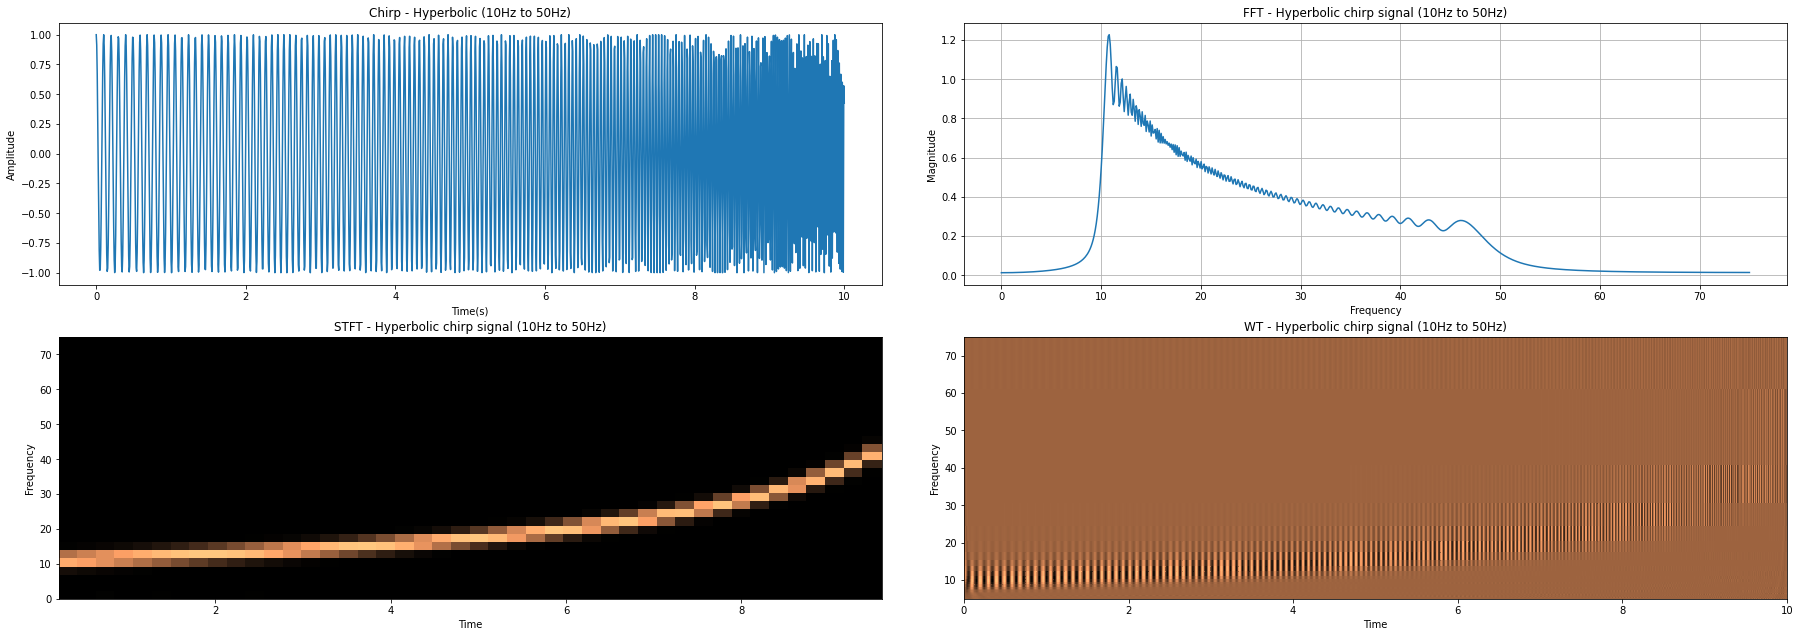

In [ ]:
plot_chirp_transforms('Hyperbolic',10,50)

#Signal Translation
Signal translation/Time shifting of a signal is changing or delaying the current time of signal. A signal translation can be represented as $x(t)->y(t+k)$ in mathematics. This $K$ number might be either positive or negative. We have two sorts of shifting based on the sign of the $k$ value: right shifting and left shifting. To demonstrate how transforms behave to signal translation, we have used some suitable signals such as unit step, ramp, rectangular, etc.

### Unit Step Signal
If a function on the real numbers can be represented as a finite linear combination of interval indicator functions, it is called a step function. A step function is a piece-wise constant function with a limited number of pieces, to put it another way. A Unit step function is denoted by $u(t)$. It is defined as

$u(t) = \bigg\{_{\;\;\;\;0\;\;\;\;otherwise}^{\;\;\;\;1\;\;\;\;if\;\;\;t\;\;\geq\;\;0}$

When we translate the signal, it will change as follows

$u(t) = \bigg\{_{\;\;\;\;0\;\;\;\;otherwise}^{\;\;\;\;1\;\;\;\;if\;\;\;t\;\;\geq\;\;1}$

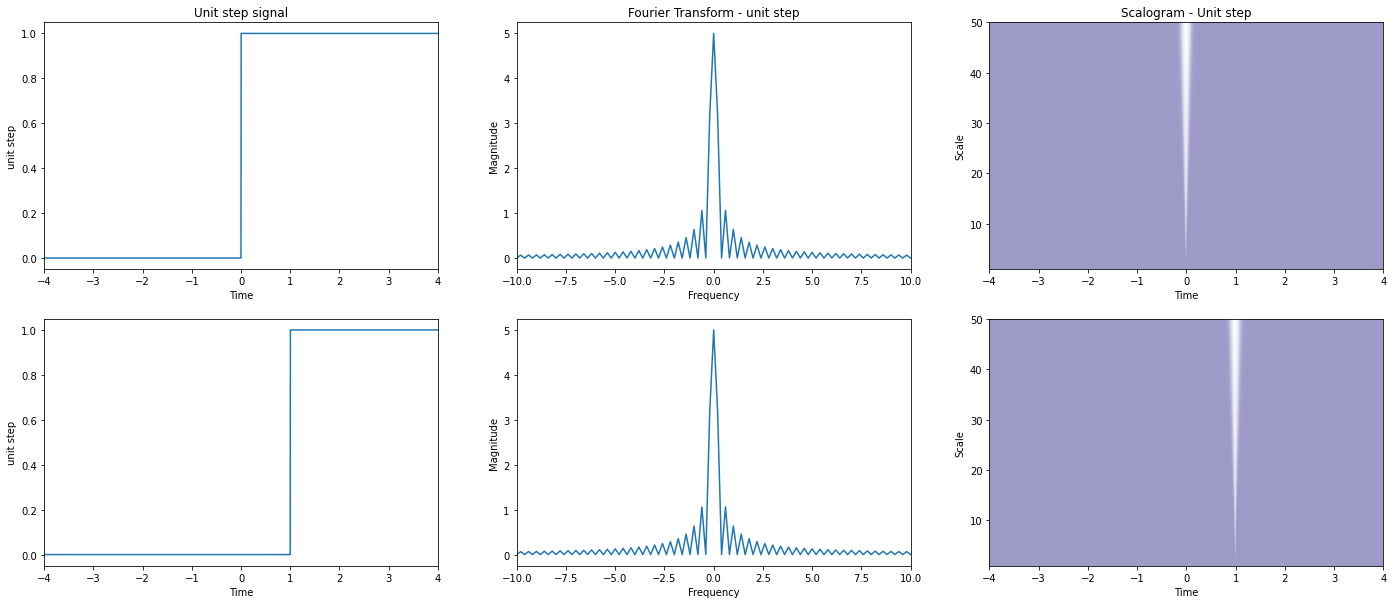

In [ ]:
N = 5000 #number of samples
fs = 1000 #sample frequency
T = 1/fs #interval
time = np.linspace(-5, 5, N)
freq = np.fft.fftfreq(N,T)
unit = np.zeros(time.shape)
unit[time>0] = 1

scales = np.arange(1,51,1)
coef,freqs = pywt.cwt(unit,scales,'gaus1')
#compute Fourier Trainsform
fft = np.fft.fft(unit)
fftShift = np.fft.fftshift(fft)
freqShift = np.fft.fftshift(freq)

#Plot signal and FFT
fig,axes =  plt.subplots(nrows=2,ncols=3,figsize=(24,10))
axes[0,0].set_title("Unit step signal")
axes[0,0].plot(time, unit)
axes[0,0].set_xlabel("Time")
axes[0,0].set_xlim(-4,4)
axes[0,0].set_ylabel("unit step")
axes[0,1].set_title("Fourier Transform - unit step")
axes[0,1].plot(freqShift,np.abs(fftShift)*2/fs)
axes[0,1].set_xlabel("Frequency")
axes[0,1].set_ylabel("Magnitude")
axes[0,1].set_xlim(-10,10)
axes[0,2].set_title("Scalogram - Unit step")
axes[0,2].pcolor(time,scales,coef,cmap='Purples')
axes[0,2].set_xlim(-4,4)
axes[0,2].set_xlabel("Time")
axes[0,2].set_ylabel("Scale")

#unit step
time = np.linspace(-4, 6, N)
unit = np.zeros(time.shape)
unit[time>1] = 1

coef,freqs = pywt.cwt(unit,scales,'gaus1')
#compute Fourier Trainsform
fft = np.fft.fft(unit)
fftShift = np.fft.fftshift(fft)
freqShift = np.fft.fftshift(freq)

#Plot signal and FFT
axes[1,0].plot(time, unit)
axes[1,0].set_xlabel("Time")
axes[1,0].set_xlim(-4,4)
axes[1,0].set_ylabel("unit step")
axes[1,1].plot(freqShift,np.abs(fftShift)*2/fs)
axes[1,1].set_xlabel("Frequency")
axes[1,1].set_xlim(-10,10)
axes[1,1].set_ylabel("Magnitude")
axes[1,2].pcolor(time,scales,coef,cmap='Purples')
axes[1,2].set_xlabel("Time")
axes[1,2].set_xlim(-4,4)
axes[1,2].set_ylabel("Scale")
plt.show()

The fourier transform remains same for both signal and translated version where wavelet shows a difference. The line in wavelet moved from 0 to 1 in wavelet transform of translated signal.

##Ramp Signal

Ramp signal is denoted by \(r(t)\), and it is defined as \\

$$r(t) = \bigg\{_{\;\;\;\;0\;\;\;\;otherwise}^{\;\;\;\;t\;\;\;\;if\;\;\;t\;\;\geq0}$$

Area under unit ramp is unity.

We shift the time of this ramp

$$r(t) = \bigg\{_{\;\;\;\;0\;\;\;\;otherwise}^{\;\;\;\;t\;\;\;\;if\;\;\;t\;\;\geq2.5}$$

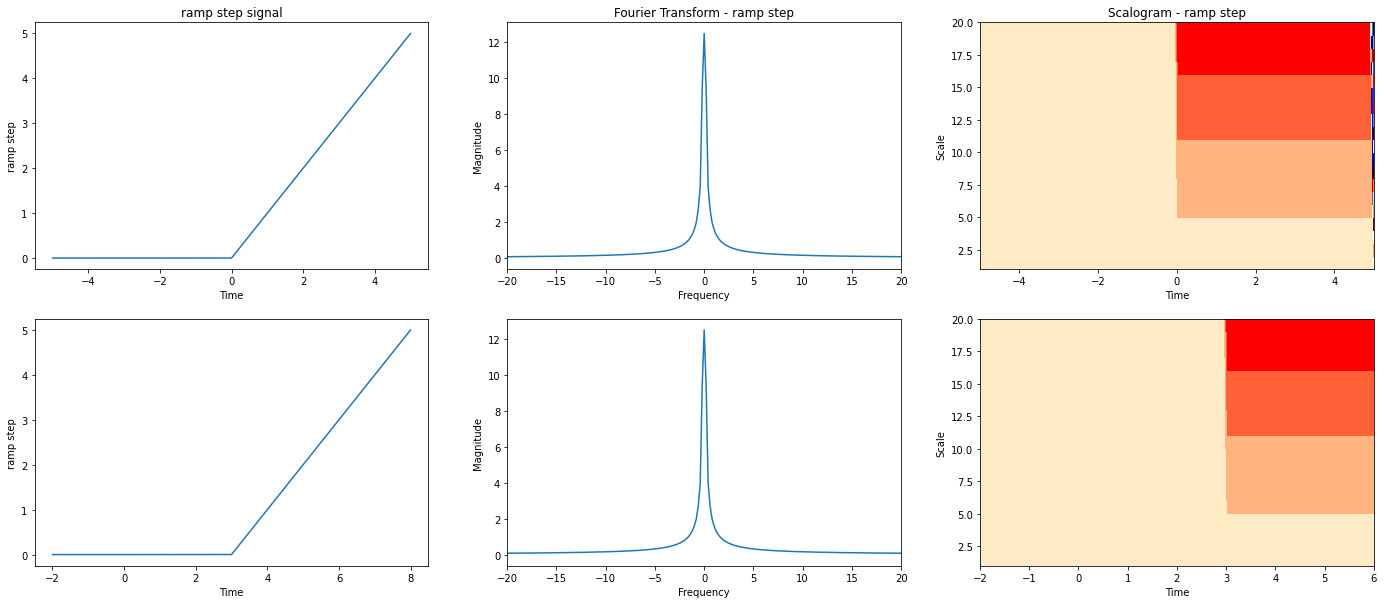

In [ ]:
N = 5000 #number of samples
fs = 1000 #sample frequency
T = 1/fs #interval
time = np.linspace(-5, 5, N)
freq = np.fft.fftfreq(N,T)

ramp = time.copy()
ramp[time<0] = 0

scales = np.arange(1,21,1)
coef,freqs = pywt.cwt(ramp,scales,'gaus1')
#compute Fourier Trainsform
fft = np.fft.fft(ramp)
fftShift = np.fft.fftshift(fft)
freqShift = np.fft.fftshift(freq)

#Plot signal and FFT
fig,axes =  plt.subplots(nrows=2,ncols=3,figsize=(24,10))
axes[0,0].set_title("ramp step signal")
axes[0,0].plot(time, ramp)
axes[0,0].set_xlabel("Time")
axes[0,0].set_ylabel("ramp step")
axes[0,1].set_title("Fourier Transform - ramp step")
axes[0,1].plot(freqShift,np.abs(fftShift)*2/fs)
axes[0,1].set_xlabel("Frequency")
axes[0,1].set_xlim(-20,20)
axes[0,1].set_ylabel("Magnitude")
axes[0,2].set_title("Scalogram - ramp step")
axes[0,2].pcolormesh(time,scales,coef,cmap='flag')
axes[0,2].set_xlabel("Time")
axes[0,2].set_ylabel("Scale")

#ramp 2
time = np.linspace(-2, 8, N)
ramp = time.copy()
ramp[time<3] = 0
ramp[time>=3] = time[time>=3]-3

coef,freqs = pywt.cwt(ramp,scales,'gaus1')
#compute Fourier Trainsform
fft = np.fft.fft(ramp)
fftShift = np.fft.fftshift(fft)
freqShift = np.fft.fftshift(freq)

#Plot signal and FFT
axes[1,0].plot(time, ramp)
axes[1,0].set_xlabel("Time")
axes[1,0].set_ylabel("ramp step")
axes[1,1].plot(freqShift,np.abs(fftShift)*2/fs)
axes[1,1].set_xlabel("Frequency")
axes[1,1].set_ylabel("Magnitude")
axes[1,1].set_xlim(-20,20)
axes[1,2].pcolormesh(time,scales,coef,cmap='flag')
axes[1,2].set_xlim(-2,6)
axes[1,2].set_xlabel("Time")
axes[1,2].set_ylabel("Scale")
plt.show()

##Rectangular pulse


We consider 50000 samples


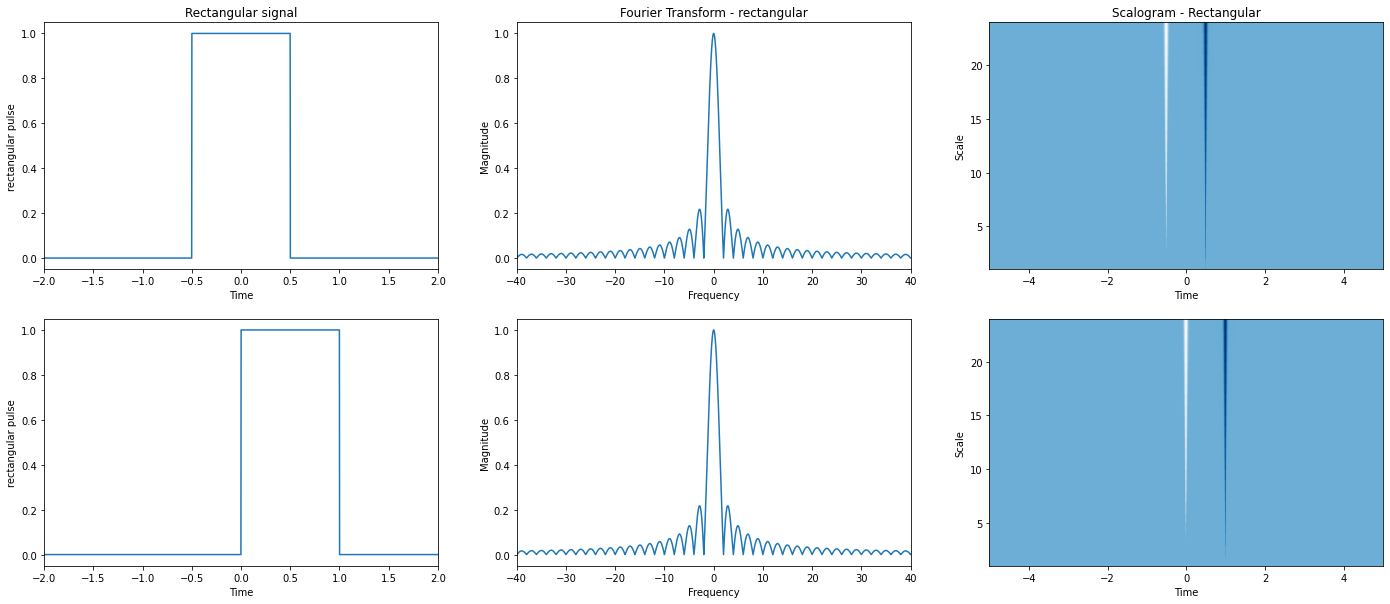

In [ ]:
N = 50000 #number of samples
fs = 1000 #sample frequency
T = 1/fs #interval
time = np.linspace(-(N*T), N*T, N)
rect = np.zeros(time.shape)
for i in range(time.shape[0]):
    if time[i] > -0.5 and time[i] < 0.5:
        rect[i] = 1.0
print("We consider {} samples".format(N))
freq =  np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)
scales = np.arange(1,25,1)
coef,freqs = pywt.cwt(rect,scales,'gaus1')
#compute Fourier Trainsform
fft_rect = np.fft.fft(rect)
freqrect = np.fft.fftfreq(time.shape[-1],T)
fftShift = np.fft.fftshift(fft_rect)
freqShift = np.fft.fftshift(freqrect)

#Plot signal and FFT
fig,axes =  plt.subplots(nrows=2,ncols=3,figsize=(24,10))
axes[0,0].set_title("Rectangular signal")
axes[0,0].plot(time, rect)
axes[0,0].set_xlim(-2,2)
axes[0,0].set_xlabel("Time")
axes[0,0].set_ylabel("rectangular pulse")
axes[0,1].set_title("Fourier Transform - rectangular")
axes[0,1].plot(freqShift,np.abs(fftShift)*2/fs)
axes[0,1].set_xlim(-40,40)
axes[0,1].set_xlabel("Frequency")
axes[0,1].set_ylabel("Magnitude")
axes[0,2].set_title("Scalogram - Rectangular")
axes[0,2].pcolor(time,scales,coef,cmap='Blues')
axes[0,2].set_xlim(-5,5)
axes[0,2].set_xlabel("Time")
axes[0,2].set_ylabel("Scale")

#rectangle 2
rect_shifted = np.zeros(time.shape)
for i in range(time.shape[0]):
    if time[i] > 0.0 and time[i] < 1.0:
        rect_shifted[i] = 1.0

coef,freqs = pywt.cwt(rect_shifted,scales,'gaus1')
#compute Fourier Trainsform
fft_rect = np.fft.fft(rect_shifted)
freqrect = np.fft.fftfreq(time.shape[-1],T)
fftShift = np.fft.fftshift(fft_rect)
freqShift = np.fft.fftshift(freqrect)

#Plot signal and FFT
axes[1,0].plot(time, rect_shifted)
axes[1,0].set_xlim(-2,2)
axes[1,0].set_xlabel("Time")
axes[1,0].set_ylabel("rectangular pulse")
axes[1,1].plot(freqShift,np.abs(fftShift)*2/fs)
axes[1,1].set_xlim(-40,40)
axes[1,1].set_xlabel("Frequency")
axes[1,1].set_ylabel("Magnitude")
axes[1,2].pcolor(time,scales,coef,cmap='Blues')
axes[1,2].set_xlim(-5,5)
axes[1,2].set_xlabel("Time")
axes[1,2].set_ylabel("Scale")
plt.show()

Text(0, 0.5, 'Scale')

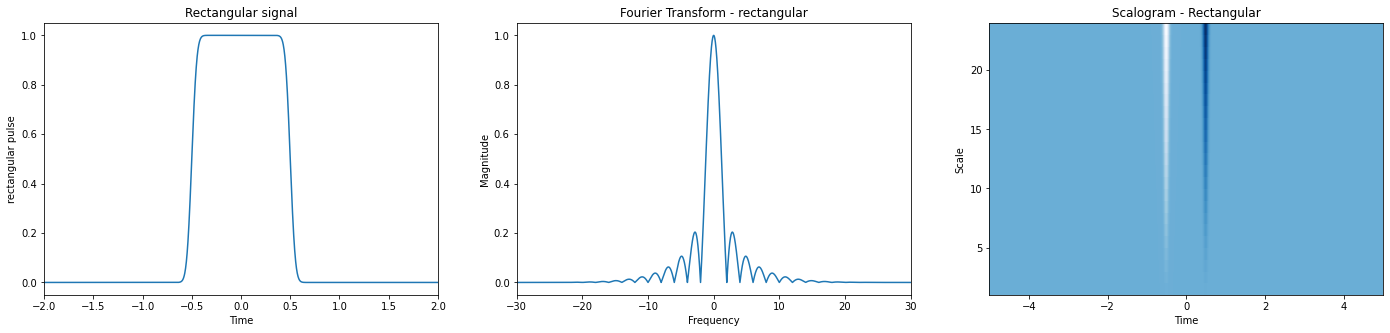

In [ ]:
rect_noisy = gaussian_filter1d(rect,20)
fft_rectn = np.fft.fft(rect_noisy)
freqShiftn = np.fft.fftshift(fft_rectn)
coefn,freqsn = pywt.cwt(rect_noisy,scales,'gaus1')

fig,axes =  plt.subplots(nrows=1,ncols=3,figsize=(24,5))
axes[0].set_title("Rectangular signal")
axes[0].plot(time, rect_noisy)
axes[0].set_xlim(-2,2)
axes[0].set_xlabel("Time")
axes[0].set_ylabel("rectangular pulse")
axes[1].set_title("Fourier Transform - rectangular")
axes[1].plot(freqShift,np.abs(freqShiftn)*2/fs)
axes[1].set_xlim(-30,30)
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Magnitude")
axes[2].set_title("Scalogram - Rectangular")
axes[2].pcolor(time,scales,coefn,cmap='Blues')
axes[2].set_xlim(-5,5)
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Scale")

##Triangular Signal

We consider 1000 samples


Text(0, 0.5, 'Scale')

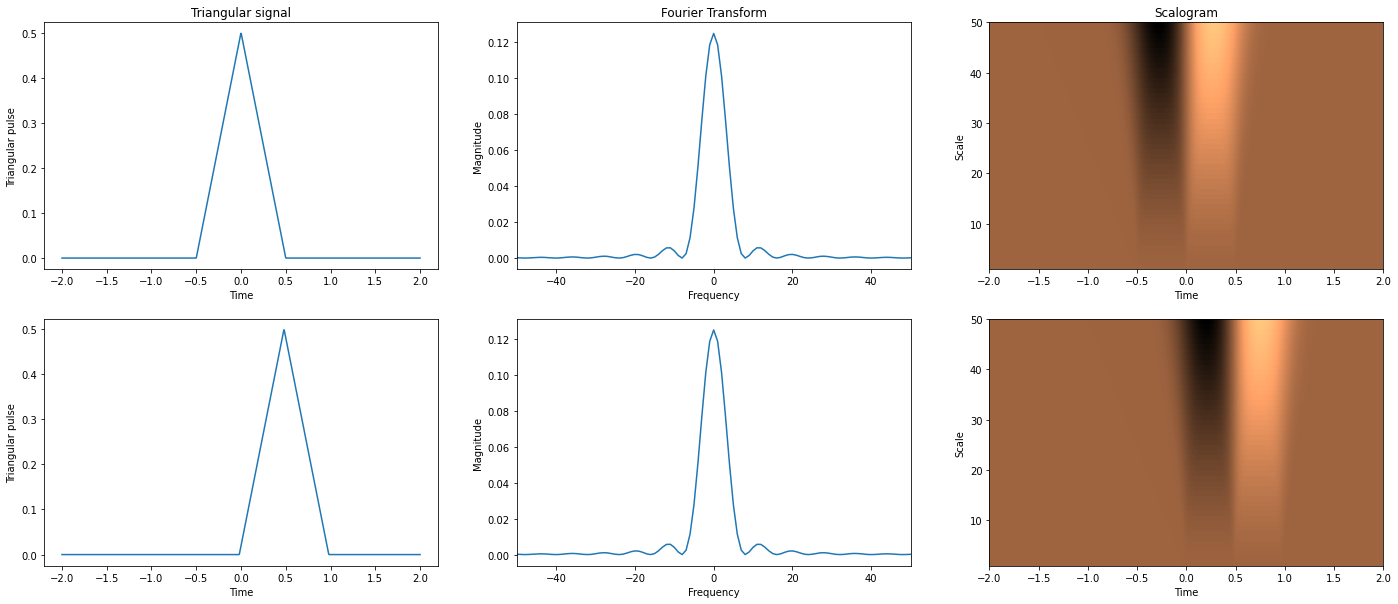

In [ ]:
N = 1000 #number of samples
fs = 1000 #sample frequency
T = 1/fs #interval
time = np.linspace(-2, 2, N)
tri = np.where(np.abs(time)<=.5,1,0)
tri = np.where(tri==1,.5-np.abs(time),0)

print("We consider {} samples".format(N))
scales = np.arange(1,51,1)
coef,freqs = pywt.cwt(tri,scales,'gaus1')
#compute Fourier Trainsform
fft = np.fft.fft(tri)
freq = np.fft.fftfreq(time.shape[-1],T)
fftShift = np.fft.fftshift(fft)
freqShift=np.fft.fftshift(freq)



#Plot signal and FFT
fig,axes =  plt.subplots(nrows=2,ncols=3,figsize=(24,10))
axes[0,0].set_title("Triangular signal")
axes[0,0].plot(time, tri)
axes[0,0].set_xlabel("Time")
axes[0,0].set_ylabel("Triangular pulse")
axes[0,1].set_title("Fourier Transform")
axes[0,1].plot(freqShift,np.abs(fftShift)*2/fs)
axes[0,1].set_xlabel("Frequency")
axes[0,1].set_xlim(-50,50)
axes[0,1].set_ylabel("Magnitude")
axes[0,2].set_title("Scalogram")
axes[0,2].pcolor(time,scales,coef,cmap='copper')
axes[0,2].set_xlim(-2,2)
axes[0,2].set_xlabel("Time")
axes[0,2].set_ylabel("Scale")

indices = np.where(tri>0)[0]
new_indices = indices+120
temp = tri.copy()
tri = np.zeros(tri.shape)
tri[new_indices] = temp[indices]


coef,freqs = pywt.cwt(tri,scales,'gaus1')
#compute Fourier Trainsform
fft = np.fft.fft(tri)
freq = np.fft.fftfreq(time.shape[-1],T)
fftShift = np.fft.fftshift(fft)
freqShift=np.fft.fftshift(freq)

#Plot signal and FFT
axes[1,0].plot(time, tri)
axes[1,0].set_xlabel("Time")
axes[1,0].set_ylabel("Triangular pulse")
axes[1,1].plot(freqShift,np.abs(fftShift)*2/fs)
axes[1,1].set_xlim(-50,50)
axes[1,1].set_xlabel("Frequency")
axes[1,1].set_ylabel("Magnitude")
axes[1,2].pcolor(time,scales,coef,cmap='copper')
axes[1,2].set_xlim(-2,2)
axes[1,2].set_xlabel("Time")
axes[1,2].set_ylabel("Scale")

##Trapezoid

Text(0, 0.5, 'Scale')

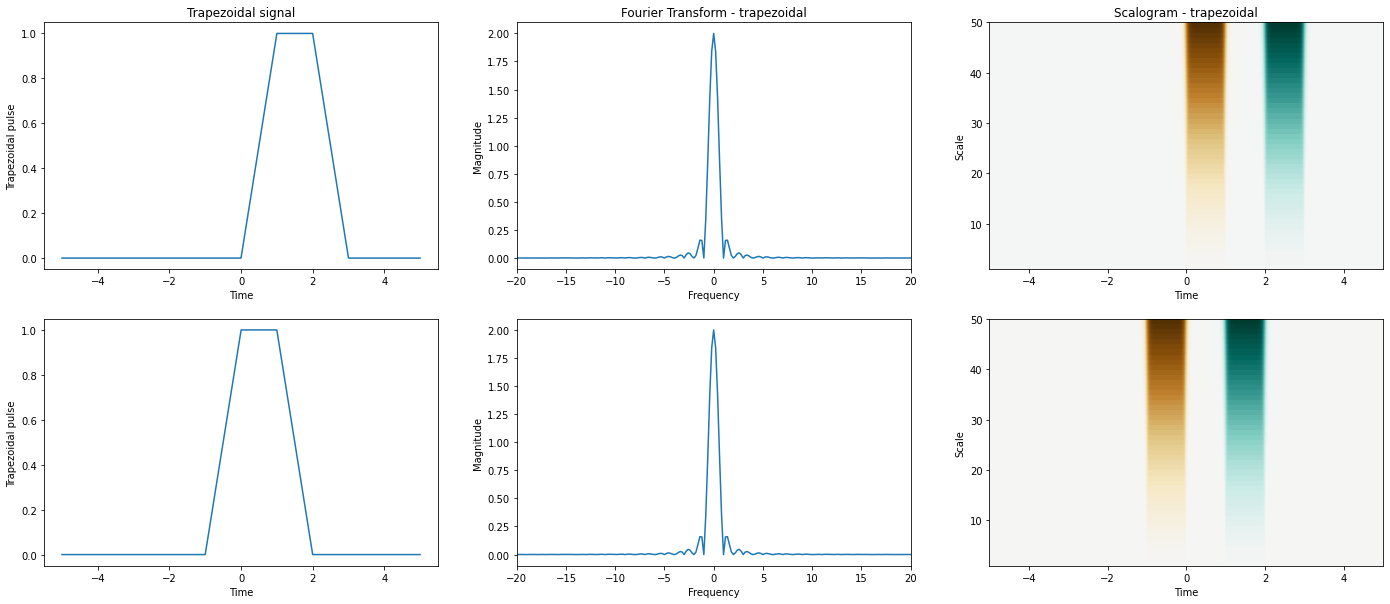

In [ ]:
N = 5000 #number of samples
fs = 1000 #sample frequency
T = 1/fs #interval
time = np.linspace(-5, 5, N)
trapzoid_signal = (time*np.where(time>0,1,0))-((time-1)*np.where((time-1)>0,1,0))-((time-2)*np.where((time-2)>0,1,0))+((time-3)*np.where((time-3)>0,1,0))

#tra = trapzoid_signal(time)

scales = np.arange(1,51,1)
coef,freqs = pywt.cwt(trapzoid_signal,scales,'gaus1')
#compute Fourier Trainsform
fft = np.fft.fft(trapzoid_signal)
freq = np.fft.fftfreq(time.shape[-1],T)
fftShift = np.fft.fftshift(fft)
freqShift=np.fft.fftshift(freq)

#Plot signal and FFT
fig,axes =  plt.subplots(nrows=2,ncols=3,figsize=(24,10))
axes[0,0].set_title("Trapezoidal signal")
axes[0,0].plot(time, trapzoid_signal)
axes[0,0].set_xlabel("Time")
axes[0,0].set_ylabel("Trapezoidal pulse")
axes[0,1].set_title("Fourier Transform - trapezoidal")
axes[0,1].plot(freqShift,np.abs(fftShift)*2/fs)
axes[0,1].set_xlim(-20,20)
axes[0,1].set_xlabel("Frequency")
axes[0,1].set_ylabel("Magnitude")
axes[0,2].set_title("Scalogram - trapezoidal")
axes[0,2].pcolor(time,scales,coef,cmap='BrBG')
axes[0,2].set_xlim(-5,5)
axes[0,2].set_xlabel("Time")
axes[0,2].set_ylabel("Scale")

trapzoid_signal = ((time+1)*np.where((time+1)>0,1,0))-(time*np.where(time>0,1,0))-((time-1)*np.where((time-1)>0,1,0))+((time-2)*np.where((time-2)>0,1,0))
coef,freqs = pywt.cwt(trapzoid_signal,scales,'gaus1')
#compute Fourier Trainsform
fft = np.fft.fft(trapzoid_signal)
freq = np.fft.fftfreq(time.shape[-1],T)
fftShift = np.fft.fftshift(fft)
freqShift=np.fft.fftshift(freq)

#Plot signal and FFT
axes[1,0].plot(time, trapzoid_signal)
axes[1,0].set_xlabel("Time")
axes[1,0].set_ylabel("Trapezoidal pulse")
axes[1,1].plot(freqShift,np.abs(fftShift)*2/fs)
axes[1,1].set_xlim(-20,20)
axes[1,1].set_xlabel("Frequency")
axes[1,1].set_ylabel("Magnitude")
axes[1,2].pcolor(time,scales,coef,cmap='BrBG')
axes[1,2].set_xlim(-5,5)
axes[1,2].set_xlabel("Time")
axes[1,2].set_ylabel("Scale")

In the abouve signals, we shifted to different time. In each one we obtained an unchanged result for fourier transform. So the fourier transform is invariant to signal translations. But we obtained the change in wavelet transform in time.

#Transforms on Images
Both wavelets and fourier transforms can be used for image processing. So we created an synthetic image to observe the results on fourier transform.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


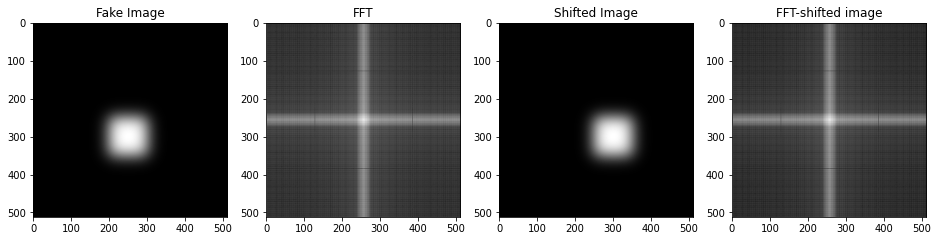

In [ ]:
#Image Generation
sigma = 20
fake_image = np.repeat(a=np.repeat(a=160,repeats=512),repeats=512).reshape([512,512])
fake_image_translated = fake_image.copy()
fake_image[250:350,200:300] = 190
fake_image_translated[250:350,250:350] = 190
fake_image = filters.gaussian(fake_image, sigma=sigma, preserve_range=True)
fake_image_translated = filters.gaussian(fake_image_translated, sigma=sigma, preserve_range=True)
fake_image = rgb2gray(fake_image)/255
fake_image_translated = rgb2gray(fake_image_translated)/255

#Fourier transform
fft_fake = fftpack.fft2(fake_image)
fft_fake = fftpack.fftshift(fft_fake)
fft_fake2 = fftpack.fft2(fake_image_translated)
fft_fake2 = fftpack.fftshift(fft_fake2)

#Plot
fig,axes = plt.subplots(ncols=4,figsize=(16,4));
axes[0].set_title("Fake Image");
axes[0].imshow(fake_image,cmap='gray');
axes[1].set_title("FFT");
axes[1].imshow(np.log(np.abs(fft_fake)),cmap='gray');
axes[2].set_title("Shifted Image");
axes[2].imshow(fake_image_translated,cmap='gray');
axes[3].set_title("FFT-shifted image");
axes[3].imshow(np.log(np.abs(fft_fake2)),cmap='gray');
plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  


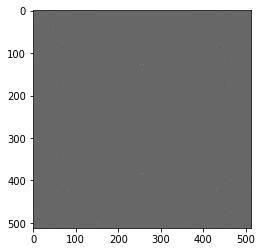

In [ ]:
#Finding the similarity between fourier transform results.
plt.imshow(np.log(np.abs(fft_fake))-np.log(np.abs(fft_fake2)),cmap='gray')

In this picture, we tried to create two images with a square in the middle and in a different position. I could not find any difference in its fourier transforms.

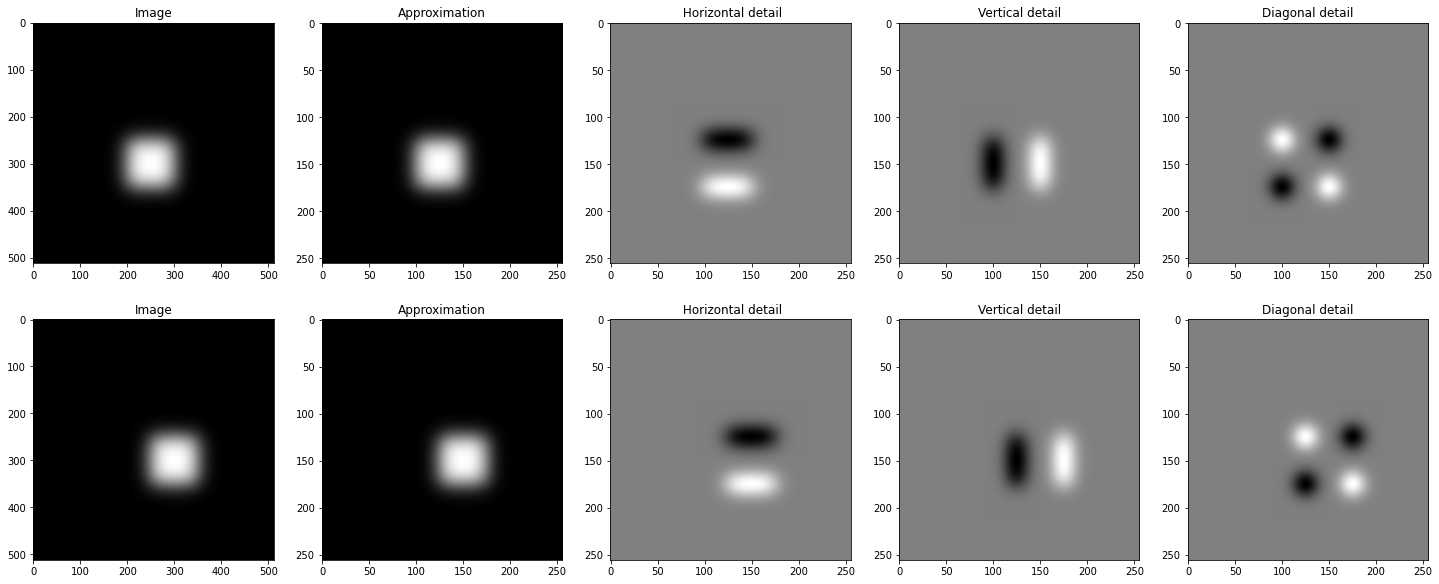

In [ ]:
titles = ['Approximation', ' Horizontal detail','Vertical detail', 'Diagonal detail']
coeffs_fi = pywt.dwt2(fake_image, 'haar')
coeffs_fi_translated = pywt.dwt2(fake_image_translated, 'haar')
coef_array = []
cA1, (cH1, cV1, cD1) = coeffs_fi
cA2, (cH2, cV2, cD2) = coeffs_fi_translated
coef_array.append([cA1,cH1, cV1, cD1])
coef_array.append([cA2,cH2, cV2, cD2])
fig,axes = plt.subplots(nrows=2,ncols=5,figsize=(25,10))
axes[0,0].set_title("Image")
axes[0,0].imshow(fake_image,cmap='gray')
axes[1,0].set_title("Image")
axes[1,0].imshow(fake_image_translated,cmap='gray')
for i,arr in enumerate(coef_array):
  for idx,coef in enumerate(arr):
    axes[i,idx+1].set_title(titles[idx])
    axes[i,idx+1].imshow(coef,cmap='gray')

Then I smoothened the image using gaussian and tried find fourier transform. There were a big difference in original and smoothened one.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


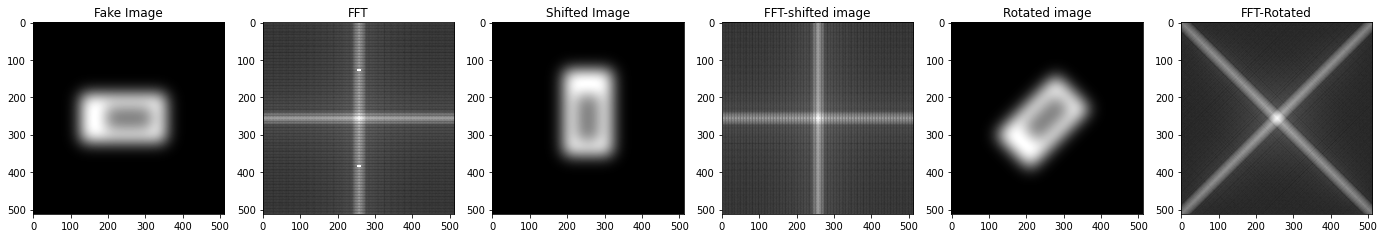

In [ ]:
from scipy import ndimage

#Image Generation
line_image = np.repeat(a=np.repeat(a=0,repeats=512),repeats=512).reshape([512,512])
line_image_translated = line_image.copy()
line_image[192:320,128:354] = 165
line_image[224:288,192:320] = 70
line_image_translated[128:354,192:320] = 165
line_image_translated[192:320,224:288] = 70
line_image = filters.gaussian(line_image, sigma=sigma, preserve_range=True)
line_image_translated = filters.gaussian(line_image_translated, sigma=sigma, preserve_range=True)
line_image = rgb2gray(line_image)/255
line_image_translated = rgb2gray(line_image_translated)/255
line_image_rot = ndimage.rotate(line_image, 45, reshape=False)


#Fourier transform
fft_line = fftpack.fft2(line_image)
fft_line = fftpack.fftshift(fft_line)
fft_line_t = fftpack.fft2(line_image_translated)
fft_line_t = fftpack.fftshift(fft_line_t)
fft_line_r = fftpack.fft2(line_image_rot)
fft_line_r = fftpack.fftshift(fft_line_r)

#Plot
fig,axes = plt.subplots(ncols=6,figsize=(24,4))
axes[0].set_title("Fake Image")
axes[0].imshow(line_image,cmap='gray')
axes[1].set_title("FFT")
axes[1].imshow(np.log(np.abs(fft_line)),cmap='gray')
axes[2].set_title("Shifted Image")
axes[2].imshow(line_image_translated,cmap='gray')
axes[3].set_title("FFT-shifted image")
axes[3].imshow(np.log(np.abs(fft_line_t)),cmap='gray')
axes[4].set_title("Rotated image")
axes[4].imshow(line_image_rot,cmap='gray')
axes[5].set_title("FFT-Rotated")
axes[5].imshow(np.log(np.abs(fft_line_r)),cmap='gray')
plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.


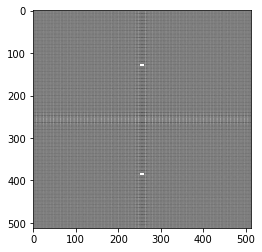

In [ ]:
plt.imshow(np.log(np.abs(fft_line))-np.log(np.abs(fft_line_t)),cmap='gray')

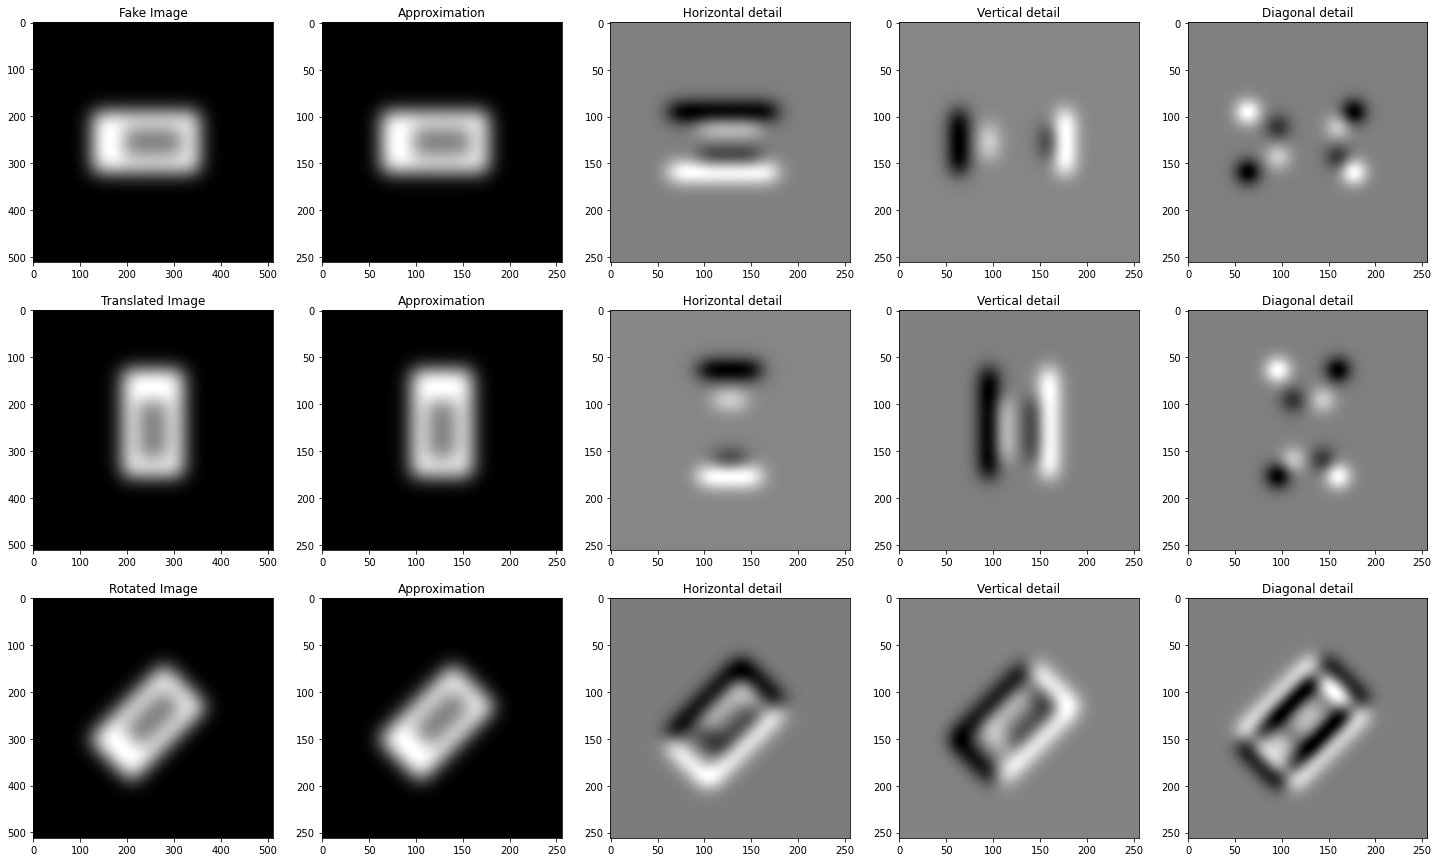

In [ ]:
coef_line = pywt.dwt2(line_image, 'haar')
coef_line_t = pywt.dwt2(line_image_translated, 'haar')
coef_line_r = pywt.dwt2(line_image_rot, 'haar')
dwt_coef_array = []
lcA1, (lcH1, lcV1, lcD1) = coef_line
lcA2, (lcH2, lcV2, lcD2) = coef_line_t
lcA3, (lcH3, lcV3, lcD3) = coef_line_r
dwt_coef_array.append([lcA1,lcH1, lcV1, lcD1])
dwt_coef_array.append([lcA2,lcH2, lcV2, lcD2])
dwt_coef_array.append([lcA3,lcH3, lcV3, lcD3])
fig,axes = plt.subplots(nrows=3,ncols=5,figsize=(25,15))
axes[0,0].set_title("Fake Image")
axes[0,0].imshow(line_image,cmap='gray')
axes[1,0].set_title("Translated Image")
axes[1,0].imshow(line_image_translated,cmap='gray')
axes[2,0].set_title("Rotated Image")
axes[2,0].imshow(line_image_rot,cmap='gray')
for i,arr in enumerate(dwt_coef_array):
  for idx,coef in enumerate(arr):
    axes[i,idx+1].set_title(titles[idx])
    axes[i,idx+1].imshow(coef,cmap='gray')

In [ ]:
from PIL import Image
# open the original image
original_img = Image.open("/content/drive/MyDrive/DSIP/parrot1.jpg")


#rotate image
rot_180 = original_img.rotate(180, Image.NEAREST, expand = 1)

# close all our files object

I = np.array(original_img)
I_rot = np.array(rot_180)


original_img.close()

I_grey = rgb2gray(I)
I_rot_grey = rgb2gray(I_rot)


fft2 = fftpack.fft2(I_grey)
fftshift = fftpack.fftshift(fft2)
fftrot2 = fftpack.fft2(I_rot_grey)
fftrotshift = fftpack.fftshift(fftrot2)

coeffs2 = pywt.dwt2(I_grey, 'haar')
cA, (cH, cV, cD) = coeffs2
titles = ['Approximation', ' Horizontal detail','Vertical detail', 'Diagonal detail']
coeffs3 = pywt.dwt2(I_rot_grey, 'haar')
cA1, (cH1, cV1, cD1) = coeffs3



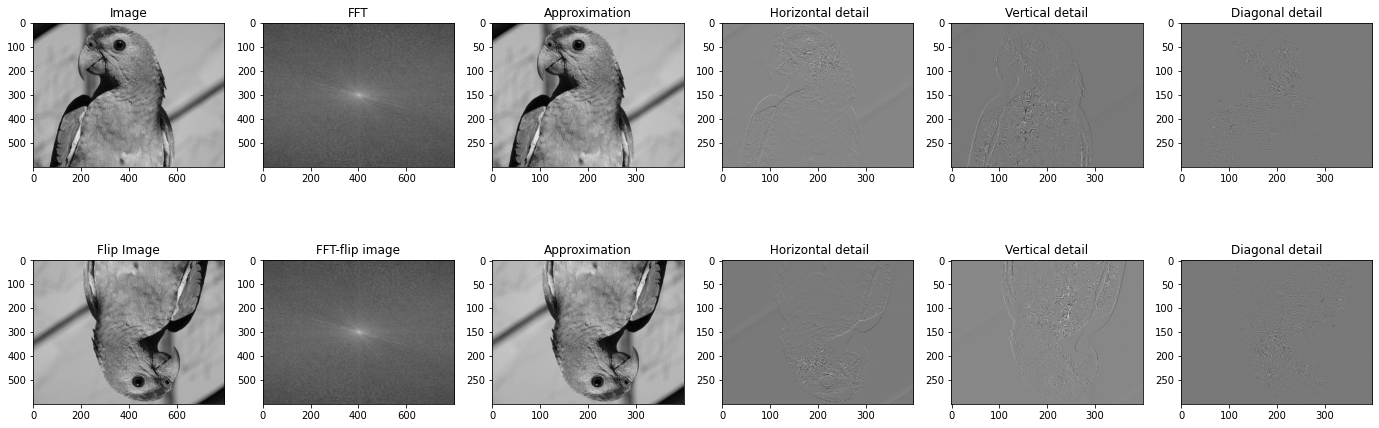

In [ ]:
fig,axes = plt.subplots(ncols=6,nrows=2,figsize=(24,8))

axes[0,0].set_title("Image")
axes[0,0].imshow(img_as_float(I_grey),cmap='gray')
axes[0,1].set_title("FFT")
axes[0,1].imshow(np.log(np.abs(fftshift)),cmap='gray')
axes[1,0].set_title("Flip Image")
axes[1,0].imshow(img_as_float(I_rot_grey),cmap='gray')
axes[1,1].set_title("FFT-flip image")
axes[1,1].imshow(np.log(np.abs(fftrotshift)),cmap='gray')


for idx,coef in enumerate((cA,cH,cV,cD)):
  axes[0,idx+2].set_title(titles[idx])
  axes[0,idx+2].imshow(coef,cmap='gray')
for idx,coef in enumerate((cA1,cH1,cV1,cD1)):
  axes[1,idx+2].set_title(titles[idx])
  axes[1,idx+2].imshow(coef,cmap='gray')
plt.show();

Fourier transform were not able to detect the rotation of images, where the wavelet transform does.

#Audio

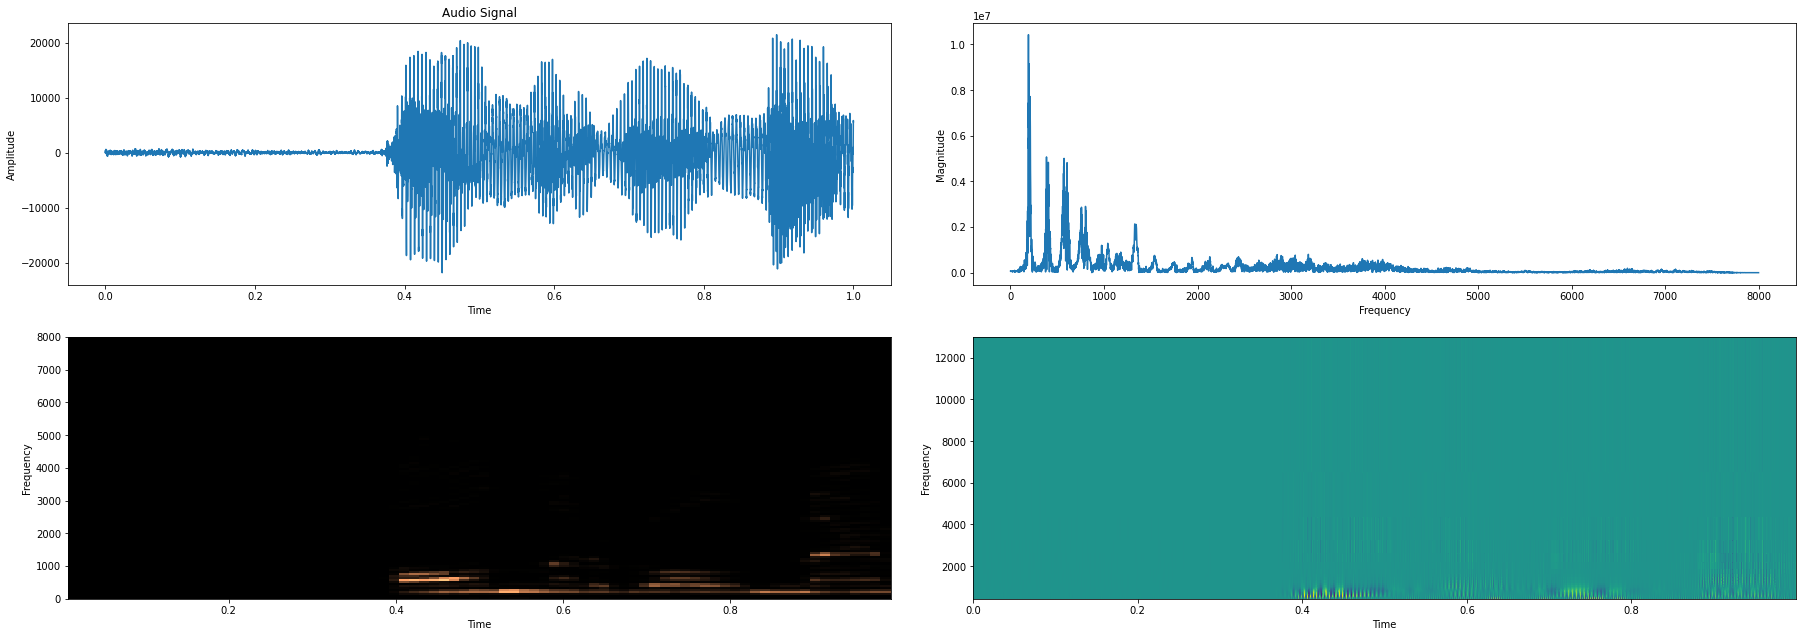

In [ ]:
from scipy.io import wavfile
import scipy
#Read Audio and compute time
sr, data = wavfile.read('/content/drive/MyDrive/DSIP/5.wav')
dt = 1/sr
time = np.arange(0,1,dt)
#Find FFT and frequencies
fft_aud = np.fft.fft(data)
fft_aud=fft_aud[0:int(sr/2)]
freq = (sr/2)*np.linspace(0,1,int(sr/2))
plt.plot(time,data)

#Compute STFT
stft_f, stft_t, Sxx = signal.spectrogram(data, sr,window='hann', nperseg=256,noverlap=64)

#Compute Wavelet Transform(morlet)
widths = np.arange(1, 31)
wt,wfreqs = pywt.cwt(data,widths,'morl')
gs = gridspec.GridSpec(2,2)
gs.update(left=0, right=4,top=2,bottom=0, hspace=.2,wspace=.1)

ax0 = plt.subplot(gs[0, 0])
ax0.set_title("Audio Signal")
ax0.plot(time,data)
ax0.set_xlabel("Time")
ax0.set_ylabel("Amplitude")
ax1 = plt.subplot(gs[0, 1])
ax1.plot(freq, np.abs(fft_aud))
ax1.set_xlabel("Frequency")
ax1.set_ylabel("Magnitude")
ax2 = plt.subplot(gs[1, 0])
ax2.pcolor(stft_t, stft_f, Sxx, cmap='copper')
ax2.set_xlabel("Time")
ax2.set_ylabel("Frequency")
ax3 = plt.subplot(gs[1, 1])
ax3.pcolormesh(time, wfreqs/dt, wt)
ax3.set_xlabel("Time")
ax3.set_ylabel("Frequency")
plt.show()